<a href="https://colab.research.google.com/github/ravitshawnuriel/EDA_NAYA_ravit-efrat/blob/main/Project2_EDA_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 2-EDA**

**UK Accidents**

- Ravit Shaw Nuriel
- Efrat Weil Pinhas

# Preface



1. **Target:**

    * Obtaining a general perspective on the amount of accidents and fatal accidents over the years.

    * Find characteristics and factors that effect the rate of fatal road accidents in the last five, given that an accident occured.


2. **Raw files:**
        These files contain information from the last five years from UK govermant website about:
        1. accidents 
        2. accidents's vehicles
        3. accidents's casualties

        additioanl data:

        1. UK populationan
        2. columns dictionary
        3. London, England, United Kingdom — Sunrise, Sunset, and Daylength


3. **Data Source:**

    [UK Accidents](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data)

    [UK populationan](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/articles/overviewoftheukpopulation/january2021)

    [UK Daylength](https://www.timeanddate.com/sun/uk/london)
    

4. **Outline:**
* Qeustion 1 (Efrat)- general perspective over the years (1980-2019)
* Qeustion 2 (Ravit)- weather conditions and hazards in the way
* Qeustion 3 (Ravit)- vehicle manoeuver and gender Influence
* Qeustion 4 (Ravit)- weekdays and age Influence
* Qeustion 5 (Efrat)- finding "red roads"


# Preliminaries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import animation
from IPython.display import HTML, display
from datetime import datetime
import math

* The raw files are contain 40 years of data and their weight arround 1.5 GB  each (both colab and excel fail to upload them).

* The solution that was chosed is to split the file by year and append every second year to Dataframe in colab notebook. (~70 files - [link](https://drive.google.com/drive/folders/1Bly4TfDqeAc7VytvgJEhdtZ_eLIU7hnL?usp=sharing))

In [ ]:
# uploading the data
#1. data of Acc. in UK at the 5 last years 
url='https://drive.google.com/file/d/1sWBpuEfSSxTcqL8EliMyv91jp3gR8baE/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_acc = pd.read_csv(dwn_url)

#2. data of Cau. in UK at the 5 last years road Acc.
url='https://drive.google.com/file/d/1qdtAUX3BwGjStzVIvy9z2WEz3QJ5R34E/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_cau = pd.read_csv(dwn_url)

#3. data of vehicles in UK at the 5 last years road Acc.
url='https://drive.google.com/file/d/1TZy4Qmj-23QrXKMzCMPsyr4n94oGOv26/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_veh = pd.read_csv(dwn_url)

#4. the dictionary data - columns explanations for UK accidents tables
url='https://drive.google.com/file/d/1SvMo1gY7j0G9eJmFWlUpUX0pV2oMV7q_/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_dict_col = pd.read_csv(dwn_url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,2,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# UK populationan
url='https://drive.google.com/file/d/1tJ6diFGcudM3f5uMXZzc7R7F3s8xLMZC/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_uk_pop = pd.read_csv(dwn_url)

# UK Light hour
url='https://drive.google.com/file/d/1zs1YQo3CBUsmALn4VWE0M7udUKa4rIaC/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_light_hour = pd.read_csv(dwn_url)

# pivot table- accident-severity group by year
url='https://drive.google.com/file/d/1mG0RhJ1UyaBlKkJGU5O_aFWYQJR7KEmp/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_year_sev_pvt = pd.read_csv(dwn_url)

# Cleaning to EDA

1. In case that data missing, a value of -1 was entered.u these cells have been replaced to np.nan 

In addition:
* road_type = 6                (unknown)
* speed_limit = 99             (unknown)
* weather_conditions= 9        (unknown)
* weather_conditions= 8        (other)
* road_surface_conditions = 9  (unknown)
* carriageway_hazards = 9      (unknown)

In [ ]:
df_acc.shape

(597973, 36)

In [ ]:
df_acc = df_acc.replace(-1, np.nan)
df_acc.shape

(597973, 36)

In [ ]:
df_acc = df_acc.replace({'road_type': 6, 
                         'speed_limit': 99,
                         'weather_conditions' : 9,
                         'weather_conditions' : 8,
                         'road_surface_conditions' : 9,                       
                         'carriageway_hazards' : 9,       
                         }, np.nan)

2. drop duplicates

In [ ]:
df_acc.drop_duplicates(subset=None, keep='first', inplace=True)

3. Delete rows that have exceptional values
for example, age of driver below 15
(age band category 1-3)

In [ ]:
df_veh = df_veh[df_veh.age_band_of_driver.between(4,11)]

4. for time analysis (question 1) year 2020 droped-

* After an initial examination of the data, it seems that 2020 was greatly affected by the COVID-19 pandemic. we decided to remove this year from the project.

# Data Inspection

1. Link between the tables:

    * Every accident, vehicle and casualty has an ID. 
    * For each vehicle has the ID of the accident. 
    * For each casualty, the ID of his vehicle and the accident are defined. 

2. General information:

In [ ]:
df_acc.info()

In [ ]:
df_acc.nunique()

In [ ]:
df_acc.accident_year.unique()

array([2016, 2017, 2018, 2019, 2020])

In [ ]:
df_acc.isnull().sum(axis = 0)

3. View the distribution of columns that have less than 9 unique values:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


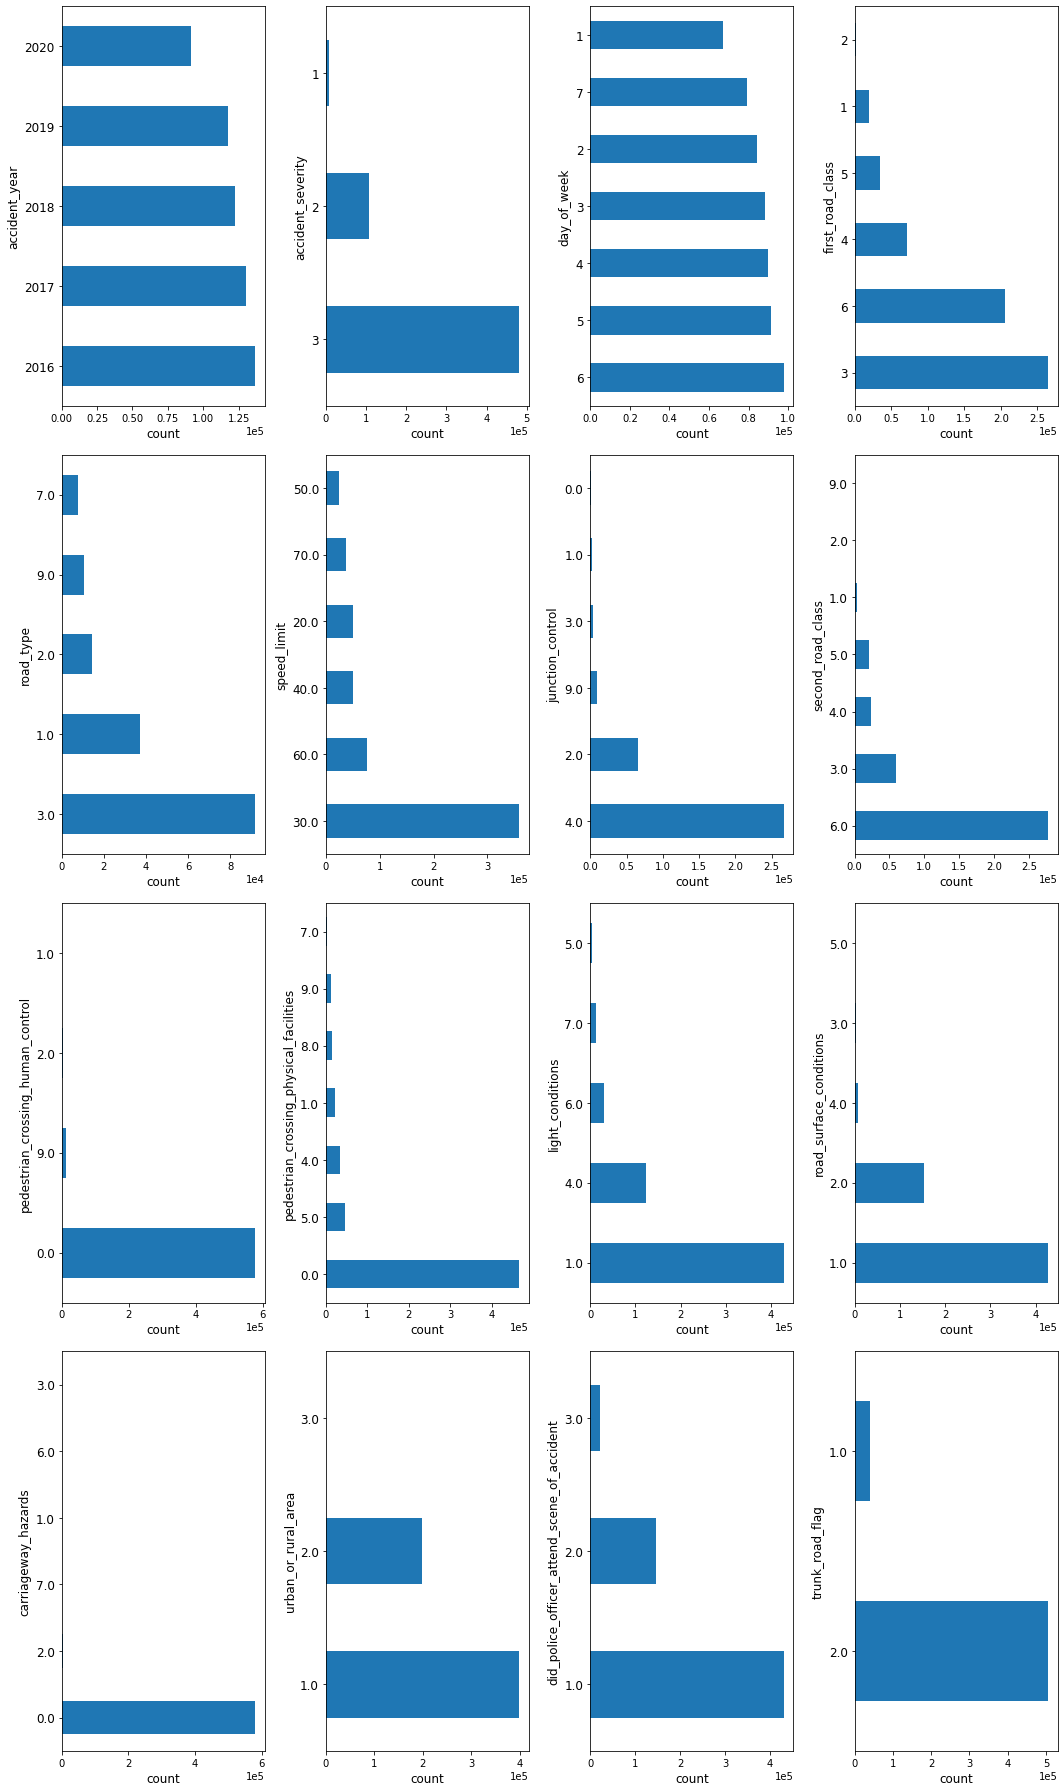

In [ ]:
count_col =0
for column in df_acc.columns:
    if df_acc[column].nunique()<8: 
        count_col +=1

rows = math.ceil(count_col/4)
cols= 4

plt.subplots(rows,cols,figsize=(15,25))
plt.subplot(rows, cols, 1)

count =0
for column in df_acc.columns:
    if df_acc[column].nunique()<8: 
        plt.subplot(rows, cols, count+1)
        plt.tight_layout()
        plt.ylabel(column,fontsize=12)
        plt.xlabel('count',fontsize=12)
        df_acc[column].value_counts().plot.barh()
        plt.title.text='First Plot'
        # plt.xticks(fontsize=12,rotation=45)
        plt.yticks(fontsize=12)
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        count +=1 

4. Two columns are addded 'hour' and 'month'

In [ ]:
df_acc['hour'] = pd.to_datetime(df_acc.time).dt.hour
df_acc['month'] = pd.to_datetime(df_acc.date,  format='%d/%m/%Y').dt.month

5. Initial observation of the data geographical distribution,
by using scatter-plot colored by district category

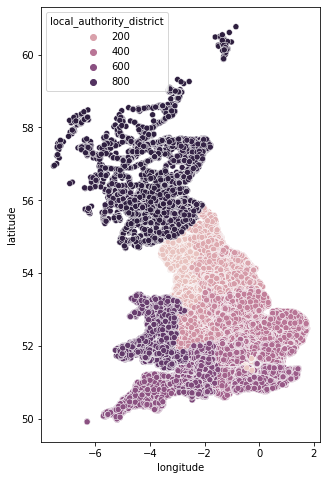

In [ ]:
plt.figure(figsize=(5,8))
sns.scatterplot(x = 'longitude', y = 'latitude',data = df_acc, hue= 'local_authority_district');

6. Initial experience in creating correlations between the various columns

covariance:

$Cov(x,y)=\frac{1}{n-1} \sum_{i=1}^n (x_i-\bar{x})*(y_i-\bar{y}) $

$Correlation = \frac{Cov(x,y)}{\sigma x*\sigma y } $

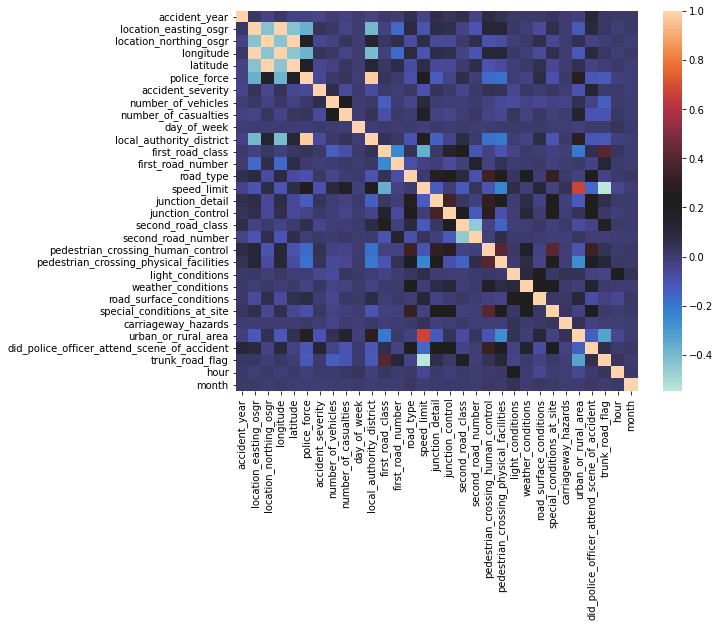

In [ ]:
plt.subplots(figsize=(9,7))
sns.heatmap(df_acc.corr(), cmap='icefire')

# Research Questions

##Qeustion 1


** NOTE **:
* The requirement for this project is that the code will work in this notebook
* The '40 years dataframes" are built by code with a loop with direct access to Drive folder. 
* Only the gmail account owner can run it.
* Entering the 70 links of the files was complicated
* Therefore, a pivot table was built with aggregation for each year for the last 40 years and thus the graphs for question 1 are drawn.
* **The animation in question 1- cannot be run in this notebook.**
* [Link to the notebook where the code works](https://colab.research.google.com/drive/1dBEOJ0jd3avRsLQZEE3TRw-G0F8GSs9t#scrollTo=lkOnFY8ONzwQ)

In [ ]:
## from google.colab import drive
# drive.mount('/content/gdrive')
# def get_df(path,prefix):
#     df=pd.DataFrame()
#     for i in range(1980,2020):
#         if (i % 2 == 0) or (i % 5 == 0):
#             file_path = path + prefix + str(i) + '.csv'
#             df=df.append(pd.read_csv(file_path))
#     return df

# path=r'/content/gdrive/MyDrive/Colab_Notebooks/Project2_EDA/files/40_years/'

# df_acc_40=get_df(path, 'accident-')     # shape:    ~5.0M   X   36           
# df_cas_40=get_df(path, 'casualty-')     # shape:    ~6.6M   X   18
# df_veh_40=get_df(path, 'vehicle-')      # shape:    ~9.5M   X   27    

### Target:
1. Obtaining a general perspective on the amount of accidents and fatal accidents over the years.

    1.1 Drawing plots of the changes in the absolute number of accidents 
and their severities over the years.
    
    1.2 Display the number of accidents in relation to the number per 100,000 persons by joining another table from the UK Government website.
    
    1.3. Divide of the data from section 1 according to the severity of the accident.
    
    1.4. Making a quality comparison to the state of Israel


* **Target 1.1 & 1.2**

We expected a gap between the two graphs due to:
* infrastructure changes
* increasing the number of vehicles 
* increasing the population.

In [ ]:
df_year_sev_pvt.head()

,accident_year,1,2,3
0,1980,5506,65714,179738
1,1982,5450,66143,184414
2,1984,5138,62048,185997
3,1985,4768,60286,180591
4,1986,4898,58190,184790


,year,accident_year,1,2,3,accident_abs,population,rates_per_100k,pop_growth %,acc_abs_growth %,acc_rate_growth %
0,0,1980,5506,65714,179738,250958,56329700,445.5,NaN,NaN,NaN
1,1,1982,5450,66143,184414,256007,56290700,454.8,-0.069235,2.011890,2.087542
2,2,1984,5138,62048,185997,253183,56409300,448.8,0.210692,-1.103095,-1.319261
3,3,1985,4768,60286,180591,245645,56554000,434.4,0.256518,-2.977293,-3.208556
4,4,1986,4898,58190,184790,247878,56683800,437.3,0.229515,0.909035,0.667587


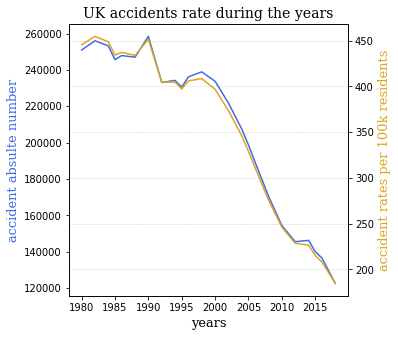

In [ ]:
df_year_sev = df_year_sev_pvt.set_index('accident_year')
df_year_sev['accident_abs'] =df_year_sev.sum(axis = 1)
df_year_sev = df_year_sev.join(df_uk_pop.set_index('Year')).reset_index()
df_year_sev = df_year_sev.rename(columns={'Estimates':'population'}).sort_index()
df_year_sev['rates_per_100k'] = round(df_year_sev.accident_abs/df_year_sev.population*100000,1)
df_year_sev['pop_growth %'] = (df_year_sev.population - df_year_sev.population.shift(periods=1))/df_year_sev.population.shift(periods=1)*100
df_year_sev['acc_abs_growth %'] = (df_year_sev.accident_abs - df_year_sev.accident_abs.shift(periods=1))/df_year_sev.accident_abs.shift(periods=1)*100
df_year_sev['acc_rate_growth %'] = (df_year_sev.rates_per_100k - df_year_sev.rates_per_100k.shift(periods=1))/df_year_sev.rates_per_100k.shift(periods=1)*100
df_year_sev = df_year_sev.reset_index().rename(columns={'index':"year"})

x = df_year_sev.accident_year
y1 = df_year_sev.accident_abs
y2 = df_year_sev.rates_per_100k
plt.figure(figsize=(5,5))
plt.plot(x,y1, color='royalblue')

plt.title("UK accidents rate during the years", fontdict = {'family':'serif','color':'black','size':14})
plt.xlabel("years", fontdict = {'family':'serif','color':'black','size':13})
plt.ylabel("accident absulte number", fontdict = {'family':'serif','color':'royalblue','size':13})

plt.twinx()
plt.gca().plot(x, y2, color='goldenrod')
plt.ylabel("accident rates per 100k residents", fontdict = {'family':'serif','color':'goldenrod','size':13})
plt.grid(color='grey', alpha=0.4, linestyle='--', linewidth=0.5);
df_year_sev.head()

**conclusions:**

probably, the three factors has been compensate each other.

* **Target 1.3**

To create related graphs with a breakdown of accident severity: fatal/ severe / slight.
Because the order of magnitude are different, the data of the first year (1980) is anchored and all the other data are relative to it. the absolute number are shown in the table below.

,Fatal_pc,Serious_pc,Slight_pc,1,2,3
accident_year,,,,,,
1980,1.00,1.00,1.00,5506,65714,179738
1982,0.99,1.01,1.03,5450,66143,184414
1984,0.93,0.94,1.03,5138,62048,185997
1985,0.87,0.92,1.00,4768,60286,180591
1986,0.89,0.89,1.03,4898,58190,184790


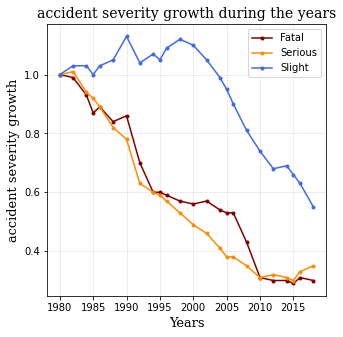

In [ ]:
df_year_sev = df_year_sev_pvt.set_index('accident_year')
year_sev_perc = df_year_sev.div(df_year_sev.iloc[0], axis='columns').round(2)
year_sev_abs = df_year_sev.rename(columns={'1' : 'Fatal_abs' , '2' : 'Serious_abs' , '3' : 'Slight_abs'})
year_sev_perc =  year_sev_perc.rename(columns={'1' : 'Fatal_pc' , '2' : 'Serious_pc' , '3' : 'Slight_pc'})
year_sev_table = year_sev_perc.join(df_year_sev)
year_sev_perc = year_sev_perc.reset_index()

plt.figure(figsize=(5,5))
plt.plot(year_sev_perc.accident_year, year_sev_perc['Fatal_pc'],  color='maroon', marker='.')
plt.plot(year_sev_perc.accident_year, year_sev_perc['Serious_pc'],color='darkorange', marker='.')
plt.plot(year_sev_perc.accident_year, year_sev_perc['Slight_pc'], color='royalblue', marker='.')

plt.title("accident severity growth during the years", fontdict = {'family':'serif','color':'black','size':14})
plt.xlabel("Years", fontdict = {'family':'serif','color':'black','size':13})
plt.ylabel("accident severity growth", fontdict = {'family':'serif','color':'black','size':13})
plt.legend(['Fatal', 'Serious', 'Slight'])
plt.grid(color='grey', alpha=0.4, linestyle='--', linewidth=0.5)

year_sev_table.head()

**conclusions:**

* We have estimated that lessons have been learned and laws applied to behaviors that cause **mostly** on fatal accidents.

    Examples: 
    * seat belts (>1991)- "Rear seat belts were compulsory equipment from 1986 and became compulsory for them to be worn in 1991" [wikipedia](https://en.wikipedia.org/wiki/Seat_belt_legislation#United_Kingdom)
    * vehicle safety systems (>2005) 
    * prohibition of stopping at the side of the road. etc.

#### Animation by months and years

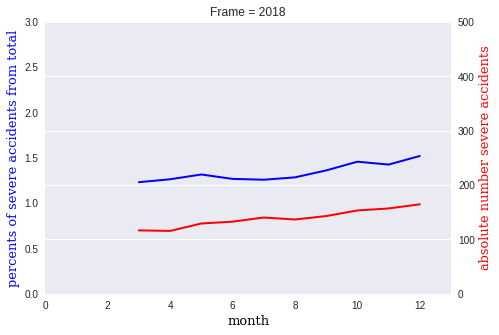

In [ ]:
# see qustion1 note

# Based on:
#https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb#scrollTo=FoFSlnl4ElYL

# def anim_func(year, args): 
#     df_input = args['df']
#     values_input = args['values']
#     index_input = args['index']
#     columns_input = args['columns']
#     aggfunc_input = args['aggfunc']    
#     col_rename = args['col_rename']  
#     filter = args['filter']   
#     year_col_name = args['year_col_name']  

#     df = df_input[df_input[year_col_name] == year] 

#     df_pvt = pd.pivot_table(df,
#                             values = values_input,
#                             index = [index_input], 
#                             columns = columns_input, 
#                             aggfunc = aggfunc_input)

#     df_pvt = df_pvt.rename(columns=col_rename)
#     df_pvt['moving_average'] = df_pvt[filter].rolling(window=3).mean()

#     df_pvt_perc = df_pvt.rename(columns=col_rename).div(df_pvt.sum(axis = 1),axis = 0)*100
#     df_pvt_perc = df_pvt_perc.reset_index()
#     df_pvt_perc['moving_average'] = df_pvt_perc[filter].rolling(window=3).mean()

#     x = list(df_pvt_perc[index_input])
#     y1 = list(df_pvt_perc.moving_average)
#     y2 = list(df_pvt.moving_average)

#     line1.set_data(x, y1)
#     line2.set_data(x, y2)
#     txt_title.set_text('Frame = {0:4d}'.format(year))

#     return (line1,line2)

# # getting started:
# df = df_acc_40
# df['hour'] = pd.to_datetime(df.time).dt.hour
# df['month'] = pd.to_datetime(df.date,  format='%d/%m/%Y').dt.month
# years = df.accident_year.unique()
# months = df.month.sort_values().unique()

# #1. df =  df filtered  with "filter"
# #2. df_pvt--  creat Pivot Table 
# #3. df_pvt- rename col
# #4. add col: 'moving_average' based on "filter" col
# parameters = {
#   "df" : df,
#   "values": "accident_index",
#   "index": 'month',
#   "columns": 'accident_severity',
#   "aggfunc": 'count',
#   "col_rename" :  {1 : 'Fatal' , 2 : 'Serious' , 3 : 'Slight'},
#   "filter" : 'Fatal',
#   "year_col_name" : 'accident_year'
#             }

# # create a figure and axes
# fig = plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# plt.xlabel(parameters['index'], fontdict = {'family':'serif','color':'black','size':13})

# # set up the subplots as needed
# plt.xlim(( 0, 13))            
# plt.ylim((0, 3))
# plt.xlabel(parameters['index'], fontdict = {'family':'serif','color':'black','size':13})
# plt.ylabel('percents of severe accidents from total', fontdict = {'family':'serif','color':'blue','size':13})
# plt.grid()

# txt_title = plt.title('')
# line1, = plt.plot([], [], 'b', lw=2)

# plt.twinx()
# line2, = plt.plot([], [], 'r', lw=2) 
# plt.ylabel('absolute number severe accidents',fontdict = {'family':'serif','color':'red','size':13})
# plt.xlim(( 0, 13))            
# plt.ylim((0, 500))
# plt.style.use("seaborn")

# fargs = (parameters,)
# anim = animation.FuncAnimation(fig, anim_func, frames=years, interval=200, blit=True, repeat = False, fargs = fargs) #

# display(HTML(anim.to_html5_video()))

* **Target 1.4**
Ariel Karlinsky's work 2020 [link](https://akarlinsky.github.io/Accidents-in-Israel/Main-RMD)


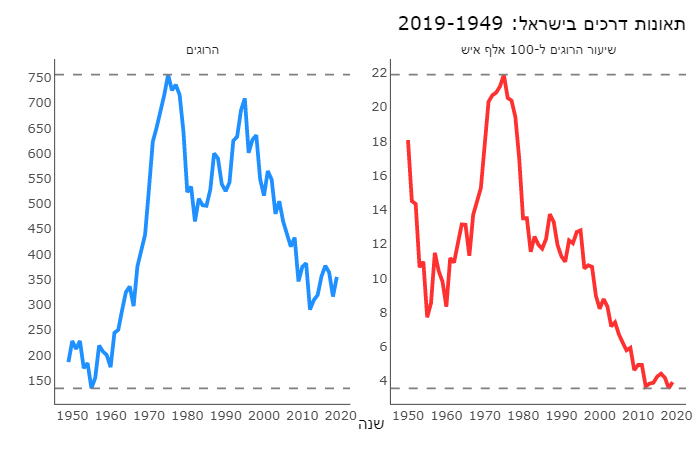

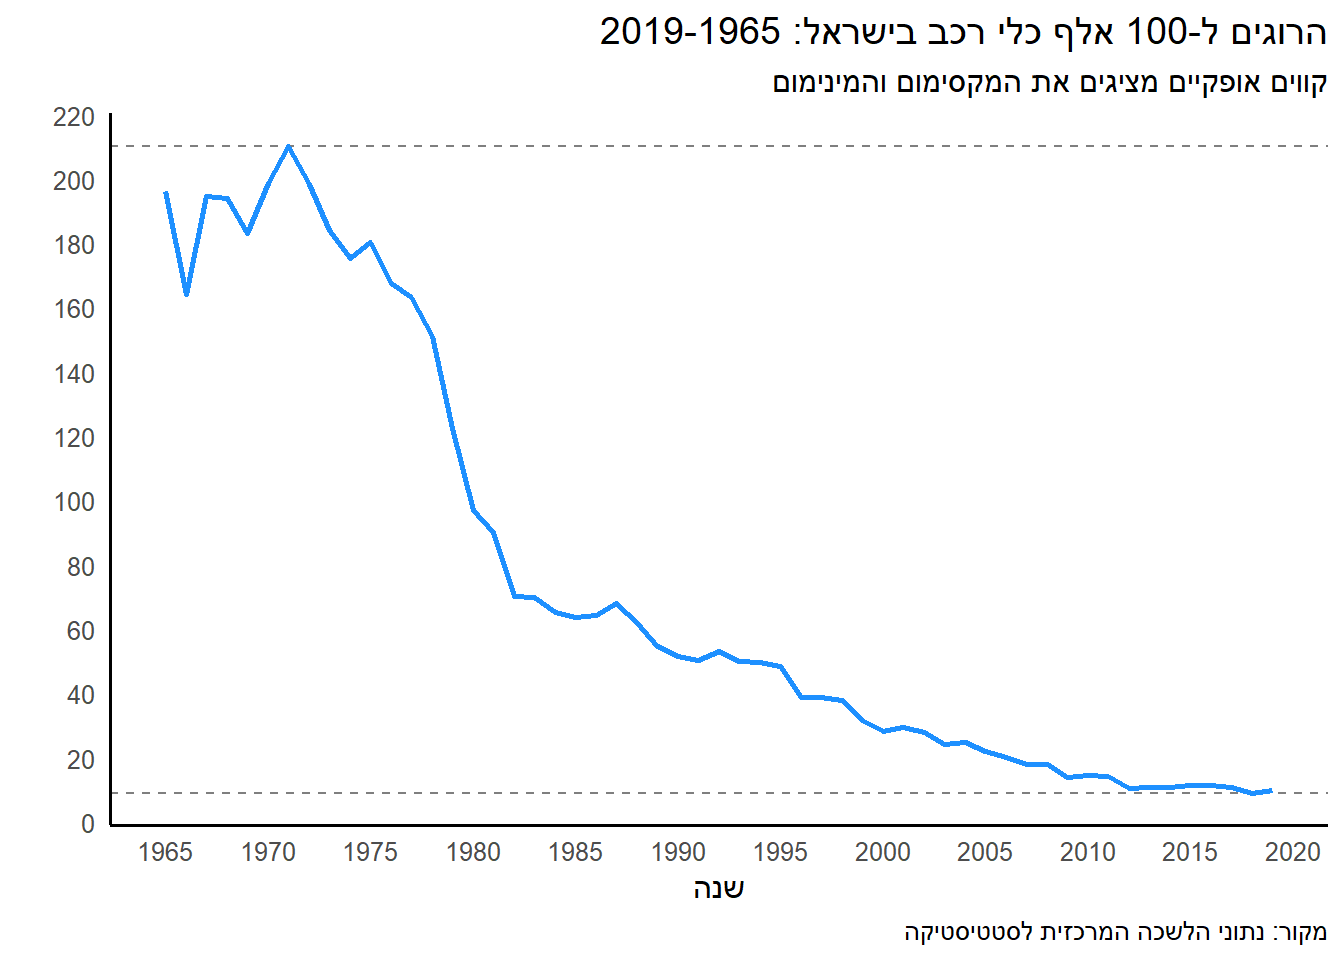

### Conclusion:

1. Over the years the number of road accidents has decreased in both the UK and Israel. 
2. In UK, when normalizing the data to the amount of the population, the data is almost identical. Therefore, In the following sections, the absolute numbers will be analyzed without normalization.

##Qeustion 2

### Target:

Find the main characteristics and factors that effect the rate of fatal road accidents, given that an accident occured.

2.1 Weather Influence
*   Examine the impact of weather conditions on road accidents.
*   Does harsh weather conditions has influence on the accident severity?
*   Is there cross influence between the weather conditions, hazards on the road and the accident severity.

### Method
Fetal acc. rate - We normalized the data of fatal acc. by dividing the total fatal acc. by the total Acc., for each categoty. 

In [ ]:
#getting the index for each weather category (dictionary data-set)
df_weather_index = df_dict_col[df_dict_col['field_name']=='weather_conditions']
df_weather_index.head(10)

,table_name,field_name,code_format,label,note
1185,Accident,weather_conditions,1,Fine no high winds,NaN
1186,Accident,weather_conditions,2,Raining no high winds,NaN
1187,Accident,weather_conditions,3,Snowing no high winds,NaN
1188,Accident,weather_conditions,4,Fine + high winds,NaN
1189,Accident,weather_conditions,5,Raining + high winds,NaN
1190,Accident,weather_conditions,6,Snowing + high winds,NaN
1191,Accident,weather_conditions,7,Fog or mist,NaN
1192,Accident,weather_conditions,8,Other,NaN
1193,Accident,weather_conditions,9,Unknown,NaN
1194,Accident,weather_conditions,-1,Data missing or out of range,NaN


In [ ]:
df_weather_index['code_format'] = df_weather_index['code_format'].astype(int)
df_weather_index = df_weather_index[df_weather_index.code_format.between(1,7)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#cleaning the DF from unknown \unclassified\missing or out of range data.
df_weather = df_acc[df_acc.weather_conditions.between(1,7)]

In [ ]:
#function for adding categories name
def add_cat_label(col_name,df_index,first_cat_index,df):
    col_label = df_index.label.tolist()
    col_dict = {}
    for i in range(len(col_label)):
        col_dict[first_cat_index+i] = col_label[i]
    df[f'{col_name}_label'] = df[col_name].replace(col_dict) 
    print(df[f'{col_name}_label'].unique())

In [ ]:
add_cat_label('weather_conditions',df_weather_index,1,df_weather)

['Fine no high winds' 'Raining no high winds' 'Fog or mist'
 'Fine + high winds' 'Raining + high winds' 'Snowing no high winds'
 'Snowing + high winds']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# function for counting only fatal acc.
def count_fatal(group):
  return sum([i for i in group if i==1])

In [ ]:
# function for groupby a specific colum, counting total acc. and fatal acc. 
# The function will add calculation of fatal acc. rate, by
# normalizing the fatal acc. rate out of the total acc. in each category.

def group_column(df,col_name,first_cat_index,df_index):
    column_g = df.groupby(col_name).agg({
    "accident_severity":lambda x: count_fatal(x), "accident_index":'count'})
    column_g.reset_index(inplace = True)
    column_g.rename(columns={'accident_severity':'fatal_acc',
    'accident_index':'total_acc'},inplace = True)
    column_g['fatal_rate(%)'] = column_g.fatal_acc.div(column_g.total_acc)*100
    column_g = column_g.round(2)
    add_cat_label(col_name,df_index,first_cat_index,column_g)
    return(column_g)

In [ ]:
weather_g = group_column(df_weather,'weather_conditions',1,df_weather_index)
weather_g

['Fine no high winds' 'Raining no high winds' 'Snowing no high winds'
 'Fine + high winds' 'Raining + high winds' 'Snowing + high winds'
 'Fog or mist']


,weather_conditions,fatal_acc,total_acc,fatal_rate(%),weather_conditions_label
0,1,6633,479217,1.38,Fine no high winds
1,2,798,68458,1.17,Raining no high winds
2,3,33,2600,1.27,Snowing no high winds
3,4,139,6268,2.22,Fine + high winds
4,5,145,6860,2.11,Raining + high winds
5,6,3,693,0.43,Snowing + high winds
6,7,87,2722,3.20,Fog or mist


In [ ]:
#function for plot - total acc. and fatal acc rate for a specific column
def col_plot(df,col_label_name,fig_size,title,h=False,l_loc = 2):
    fatal_size = (df['fatal_acc'].tolist())
    fatal_size = [i/5 for i in fatal_size]
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_size)
    plt.title(title)
    plt.grid()
    if h:
        pl_1 = plt.barh(df[col_label_name],df['total_acc'],height = 0.25,label = 'total acc.',zorder =0)
        plt.xlabel('total acc.')
        ax3 = ax.twiny()
        pl_2 = plt.plot(df['fatal_rate(%)'],df[col_label_name],'-rD', label = 'fatal acc. rate',zorder = 5)        
        pl_3 = plt.scatter(df['fatal_rate(%)'],df[col_label_name],
                           color = 'g', label = 'size = total fatal acc.',s = fatal_size ,zorder = 10)
        plt.xlabel('fatal acc. rate')
    else:
        pl_1 = plt.bar(df[col_label_name],df['total_acc'],width = 0.25,label = 'total acc.',zorder = 0)
        plt.ylabel('total acc.')
        ax3 = ax.twinx()
        pl_2 = plt.plot(df[col_label_name],df['fatal_rate(%)'],'-rD', label = 'fatal acc. rate',zorder = 5)   
        pl_3 = plt.scatter(df[col_label_name],df['fatal_rate(%)'],
                           color = 'g', label = 'size = total fatal acc.',s = fatal_size,zorder = 10 ) 
        plt.ylabel('fatal acc. rate')  
    pl = [pl_1]+pl_2 +[pl_3]
    labs = [l.get_label() for l in pl]
    ax.legend(pl, labs, loc = l_loc)



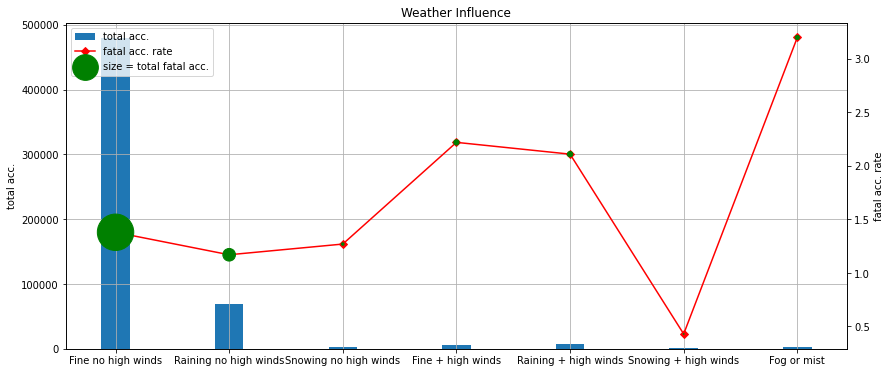

In [ ]:
weather_g.sort_values(by='weather_conditions')
col_plot(weather_g,'weather_conditions_label',(14,6),'Weather Influence')
plt.savefig('weather_influence_1.png')


This plot shows that the highest rate of fatal accidents is in sevire weather conditions, especially strong winds and fog. 

### weather conditions and hazards in the way

In [ ]:
#getting the index for each hazard category (dictionary data-set)
hazards_index = df_dict_col[df_dict_col['field_name']=='carriageway_hazards']
hazards_index.head(10)

,table_name,field_name,code_format,label,note
1214,Accident,carriageway_hazards,0,None,NaN
1215,Accident,carriageway_hazards,1,Vehicle load on road,NaN
1216,Accident,carriageway_hazards,2,Other object on road,NaN
1217,Accident,carriageway_hazards,3,Previous accident,NaN
1218,Accident,carriageway_hazards,4,Dog on road,NaN
1219,Accident,carriageway_hazards,5,Other animal on road,NaN
1220,Accident,carriageway_hazards,6,Pedestrian in carriageway - not injured,NaN
1221,Accident,carriageway_hazards,7,Any animal in carriageway (except ridden horse),NaN
1222,Accident,carriageway_hazards,-1,Data missing or out of range,NaN
1223,Accident,carriageway_hazards,9,unknown (self reported),NaN


In [ ]:
#cleaning data
hazards_index['code_format'] = hazards_index['code_format'].astype(int)
hazards_index = hazards_index[hazards_index.code_format.between(0,7)]
hazards_index.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,table_name,field_name,code_format,label,note
1214,Accident,carriageway_hazards,0,None,NaN
1215,Accident,carriageway_hazards,1,Vehicle load on road,NaN
1216,Accident,carriageway_hazards,2,Other object on road,NaN
1217,Accident,carriageway_hazards,3,Previous accident,NaN
1218,Accident,carriageway_hazards,4,Dog on road,NaN


In [ ]:
weather_hazard = df_weather[df_weather.carriageway_hazards.between(0,7)]

In [ ]:
add_cat_label('carriageway_hazards',hazards_index,0,weather_hazard)
weather_hazard

['None' 'Other object on road' 'Pedestrian in carriageway - not injured'
 'Vehicle load on road' 'Any animal in carriageway (except ridden horse)'
 'Previous accident']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hour,month,weather_conditions_label,carriageway_hazards_label
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,E09000005,3,4006,NaN,30.0,0,-1,-1,-1,0,0,5,1.0,1.0,0,0.0,1,1,2,E01000543,2,11,Fine no high winds,None
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,E09000004,3,207,NaN,30.0,9,4,6,0,0,0,4,1.0,1.0,0,0.0,1,1,2,E01000375,0,11,Fine no high winds,None
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,E09000017,3,4020,1.0,30.0,1,4,3,4020,0,0,4,1.0,1.0,0,0.0,1,1,2,E01033725,1,11,Fine no high winds,None
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,E09000024,3,217,NaN,30.0,3,2,3,217,0,0,1,1.0,1.0,0,0.0,1,1,2,E01003379,9,11,Fine no high winds,None
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,E09000018,3,312,3.0,40.0,0,-1,-1,-1,0,0,1,1.0,1.0,0,0.0,1,1,2,E01002583,7,11,Fine no high winds,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,NaN,30.0,1,4,4,959,0,0,1,1.0,1.0,0,0.0,1,1,-1,-1,14,8,Fine no high winds,None
597969,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9.0,30.0,3,4,6,0,0,0,1,1.0,1.0,0,0.0,1,2,-1,-1,15,11,Fine no high winds,None
597970,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,NaN,60.0,8,-1,6,0,0,0,1,1.0,1.0,0,0.0,2,1,-1,-1,12,4,Fine no high winds,None
597971,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,NaN,30.0,3,4,6,0,0,0,1,1.0,1.0,0,0.0,1,2,-1,-1,14,12,Fine no high winds,None


In [ ]:
hazard_g = group_column(weather_hazard,'carriageway_hazards',0,hazards_index)
fatal_rate_hazard_mean = hazard_g['fatal_rate(%)'][1:].mean()


['None' 'Vehicle load on road' 'Other object on road' 'Previous accident'
 'Pedestrian in carriageway - not injured'
 'Any animal in carriageway (except ridden horse)']


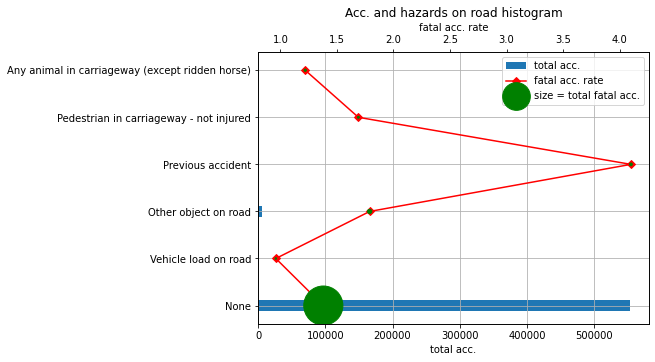

In [ ]:
col_plot(hazard_g,'carriageway_hazards_label',(7,5),'Acc. and hazards on road histogram',h=True,l_loc=1)

Due to the data distribution, we will analyse the data by two categories:
* Hazard on raod
* No Hazard

In [ ]:
def hazard_cat(row):
    if row.loc['carriageway_hazards_label'] in ['None']:
        return ('No_Hazard')
    else:
        return ('Hazard_on_road')  

weather_hazard['is_hazards'] = weather_hazard.apply(hazard_cat, axis=1)
print(weather_hazard.is_hazards.unique())

['No_Hazard' 'Hazard_on_road']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
weather_hazard_g = weather_hazard.groupby(['weather_conditions','is_hazards']).agg({
    "accident_severity":lambda x: count_fatal(x), "accident_year":'count'})
weather_hazard_g.reset_index(inplace=True)
weather_hazard_g.rename(columns={
    'accident_severity':'fatal_acc', 'accident_year':'total_acc'},inplace = True)
print(weather_hazard_g)


    weather_conditions      is_hazards  fatal_acc  total_acc
0                  1.0  Hazard_on_road        141       8132
1                  1.0       No_Hazard       6486     468357
2                  2.0  Hazard_on_road         19       1420
3                  2.0       No_Hazard        779      66540
4                  3.0  Hazard_on_road          0         69
5                  3.0       No_Hazard         33       2512
6                  4.0  Hazard_on_road          6        200
7                  4.0       No_Hazard        133       6024
8                  5.0  Hazard_on_road         11        253
9                  5.0       No_Hazard        134       6568
10                 6.0  Hazard_on_road          0         33
11                 6.0       No_Hazard          3        659
12                 7.0  Hazard_on_road          4         73
13                 7.0       No_Hazard         83       2636


In [ ]:
weather_hazard_m = pd.merge(weather_hazard_g,weather_g,on=['weather_conditions'],how='left')
weather_hazard_m.rename(columns={
    'fatal_acc_x':'fatal_hazard_weather', 'total_acc_x':'total_hazard_weather',
    'fatal_acc_y':'fatal_weather', 'total_acc_y':'total_weather'},inplace = True)


In [ ]:
#Normalizing the hazards "rate" out of the total acc. in each weather category.
weather_hazard_m['hazards(%)'] = weather_hazard_m.total_hazard_weather.div(weather_hazard_m.total_weather)*100
weather_hazard_m = weather_hazard_m.round(2)
weather_hazard_m.head()


,weather_conditions,is_hazards,fatal_hazard_weather,total_hazard_weather,fatal_weather,total_weather,fatal_rate(%),weather_conditions_label,hazards(%)
0,1.0,Hazard_on_road,141,8132,6633,479217,1.38,Fine no high winds,1.70
1,1.0,No_Hazard,6486,468357,6633,479217,1.38,Fine no high winds,97.73
2,2.0,Hazard_on_road,19,1420,798,68458,1.17,Raining no high winds,2.07
3,2.0,No_Hazard,779,66540,798,68458,1.17,Raining no high winds,97.20
4,3.0,Hazard_on_road,0,69,33,2600,1.27,Snowing no high winds,2.65


In [ ]:
# In order to examine the hazard rate, we will add to the graph the hazards % in each weather category
weather_hazard_m = weather_hazard_m[weather_hazard_m['is_hazards']=='Hazard_on_road']

In [ ]:
weather_hazard_m['hazards_fatal(%)'] = weather_hazard_m.fatal_hazard_weather.div(weather_hazard_m.fatal_weather)*100
weather_hazard_m = weather_hazard_m.round(2)
weather_hazard_m.head(7)

,weather_conditions,is_hazards,fatal_hazard_weather,total_hazard_weather,fatal_weather,total_weather,fatal_rate(%),weather_conditions_label,hazards(%),hazards_fatal(%)
0,1.0,Hazard_on_road,141,8132,6633,479217,1.38,Fine no high winds,1.70,2.13
2,2.0,Hazard_on_road,19,1420,798,68458,1.17,Raining no high winds,2.07,2.38
4,3.0,Hazard_on_road,0,69,33,2600,1.27,Snowing no high winds,2.65,0.00
6,4.0,Hazard_on_road,6,200,139,6268,2.22,Fine + high winds,3.19,4.32
8,5.0,Hazard_on_road,11,253,145,6860,2.11,Raining + high winds,3.69,7.59
10,6.0,Hazard_on_road,0,33,3,693,0.43,Snowing + high winds,4.76,0.00
12,7.0,Hazard_on_road,4,73,87,2722,3.20,Fog or mist,2.68,4.60


Plot - Hazard + Fatal

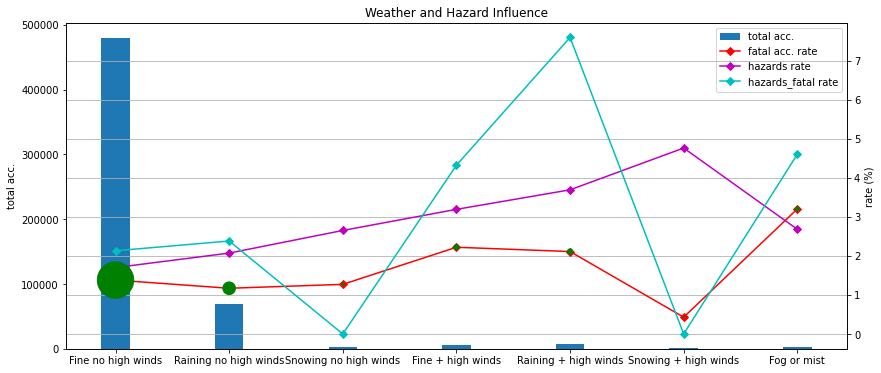

In [ ]:
fatal_size = (weather_hazard_m['fatal_weather'].tolist())
fatal_size = [i/5 for i in fatal_size]

fig, ax = plt.subplots()
fig.set_size_inches(14,6)
pl_1 = plt.bar(weather_hazard_m.weather_conditions_label,weather_hazard_m['total_weather'],width = 0.25,label = 'total acc.')
plt.ylabel('total acc.')
plt.title("Weather and Hazard Influence")
ax3 = ax.twinx()

pl_2 = plt.plot(weather_hazard_m.weather_conditions_label,weather_hazard_m['fatal_rate(%)'],'-rD', label = 'fatal acc. rate')
pl_3 = plt.scatter(weather_hazard_m.weather_conditions_label,weather_hazard_m['fatal_rate(%)'],
                    color = 'g', label = 'size = total fatal acc.',s = fatal_size,zorder = 10 ) 
pl_3 = plt.plot(weather_hazard_m.weather_conditions_label,weather_hazard_m['hazards(%)'],'-mD', label = 'hazards rate')
pl_4 = plt.plot(weather_hazard_m.weather_conditions_label,weather_hazard_m['hazards_fatal(%)'],'-cD', label = 'hazards_fatal rate')
plt.ylabel('rate (%)')
plt.grid()

pl = [pl_1]+pl_2 +pl_3+pl_4
labs = [l.get_label() for l in pl]
ax.legend(pl, labs, loc = 1);

###Conclusion:
### Weather and Hazard influence - Main findings:
1. Bar plot - With respect to absolute figurs, most of the Acc. records are in good weather conditions. Without information regarding the total trafic, we cant isolate the weather influence. 
2. Green scatter plot - The size of the dots describes the total fatal accidents. Most of the fatal acc. also accurs in fine weather. 
3. Red plot - there is a positive trend between sevire weather conditions and fatal acc. rate. We observe that there is a deviation from the trend under snowing conditions - it can be explained as it is difficult to drive so people drive slower (in addition we can see there is less acc./ traffic while snowing).
4. purple plot - At bad weather conditions more acc. are influenced by hazards. The mean fatal rate of the acc. involving hazard on the road (with-out weather considaration) is 1.95.
5. light blue plot - hazard on the road increases the liklihood of fatal road accident in any weather. There is a positive trend between sevire weather conditions. 



##Qeustion 3




### Target:
Find the main characteristics and factors that effect the rate of fatal road accidents, given that an accident occured.

###Vehicle Manoeuver Influence
*   Examine the distribution of different vehicle manoeuvers in road accidents. What are the most frequent vehicle manoeuvers in Acc.
*   Examine the distribution of different vehicle manoeuvers in fatal road accidents. Does it differ relatively to the above distribution.
*   Gender Influence - Is there a differentiation between men and women vehicle manoeuvers at the time of the accidents.

In [ ]:
# Data selection - joining two tables - accidents + vehicles
acc_join = pd.merge(df_veh,df_acc,on = 'accident_index')
acc_join.head()

,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,1,8,0,6,3,7,0,0,0,0,0,0,3,1,1,1,51,8,-1,-1,-1,-1,3,1,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,E09000005,3,4006,6,30.0,0,-1,-1,-1,0,0,5,1,1,0,0,1,1,2,E01000543
1,2016010000005,2016,010000005,2,2,0,18,7,3,0,0,0,0,0,0,1,1,6,1,23,5,124,1,4,-1,4,1,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,E09000005,3,4006,6,30.0,0,-1,-1,-1,0,0,5,1,1,0,0,1,1,2,E01000543
2,2016010000006,2016,010000006,1,9,0,18,5,1,0,2,2,10,1,0,4,1,6,2,36,7,1461,2,1,-1,10,1,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,2,E01000375
3,2016010000008,2016,010000008,1,9,0,18,1,8,0,4,5,0,0,0,1,1,6,1,24,5,1390,1,5,-1,8,1,2016,010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,2,E01033725
4,2016010000016,2016,010000016,1,11,0,18,5,1,0,1,0,0,0,0,0,1,1,1,55,8,6692,2,7,-1,9,1,2016,010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,2,E01003379


In [ ]:
# getting the manoeuvre lables
manoeu_index = df_dict_col[df_dict_col['field_name']=='vehicle_manoeuvre']
manoeu_index['code_format'] = manoeu_index['code_format'].astype(int)
manoeu_index = manoeu_index[manoeu_index.code_format.between(1,18)]
print(manoeu_index)
#cleaning the DF from unknown \unclassified\missing or out of range data.
df_manoeu = acc_join[acc_join.vehicle_manoeuvre.between(1,18)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


     table_name         field_name  ...                                label note
1278    Vehicle  vehicle_manoeuvre  ...                            Reversing  NaN
1279    Vehicle  vehicle_manoeuvre  ...                               Parked  NaN
1280    Vehicle  vehicle_manoeuvre  ...              Waiting to go - held up  NaN
1281    Vehicle  vehicle_manoeuvre  ...                  Slowing or stopping  NaN
1282    Vehicle  vehicle_manoeuvre  ...                           Moving off  NaN
1283    Vehicle  vehicle_manoeuvre  ...                               U-turn  NaN
1284    Vehicle  vehicle_manoeuvre  ...                         Turning left  NaN
1285    Vehicle  vehicle_manoeuvre  ...                 Waiting to turn left  NaN
1286    Vehicle  vehicle_manoeuvre  ...                        Turning right  NaN
1287    Vehicle  vehicle_manoeuvre  ...                Waiting to turn right  NaN
1288    Vehicle  vehicle_manoeuvre  ...                Changing lane to left  NaN
1289    Vehicle 

In [ ]:
add_cat_label('vehicle_manoeuvre',manoeu_index,1,df_manoeu)

['U-turn' 'Going ahead other' 'Changing lane to right' 'Turning right'
 'Moving off' 'Overtaking moving vehicle - offside'
 'Waiting to go - held up' 'Overtaking static vehicle - offside'
 'Slowing or stopping' 'Turning left' 'Changing lane to left' 'Reversing'
 'Waiting to turn left' 'Going ahead left-hand bend'
 'Going ahead right-hand bend' 'Waiting to turn right'
 'Overtaking - nearside' 'Parked']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
manoeu_g = group_column(df_manoeu,'vehicle_manoeuvre',1,manoeu_index)
manoeu_g

['Reversing' 'Parked' 'Waiting to go - held up' 'Slowing or stopping'
 'Moving off' 'U-turn' 'Turning left' 'Waiting to turn left'
 'Turning right' 'Waiting to turn right' 'Changing lane to left'
 'Changing lane to right' 'Overtaking moving vehicle - offside'
 'Overtaking static vehicle - offside' 'Overtaking - nearside'
 'Going ahead left-hand bend' 'Going ahead right-hand bend'
 'Going ahead other']


,vehicle_manoeuvre,fatal_acc,total_acc,fatal_rate(%),vehicle_manoeuvre_label
0,1,113,13421,0.84,Reversing
1,2,652,40877,1.60,Parked
2,3,192,52387,0.37,Waiting to go - held up
3,4,322,65574,0.49,Slowing or stopping
4,5,217,43725,0.50,Moving off
5,6,58,7008,0.83,U-turn
6,7,158,31208,0.51,Turning left
7,8,8,4567,0.18,Waiting to turn left
8,9,732,89686,0.82,Turning right
9,10,79,13695,0.58,Waiting to turn right


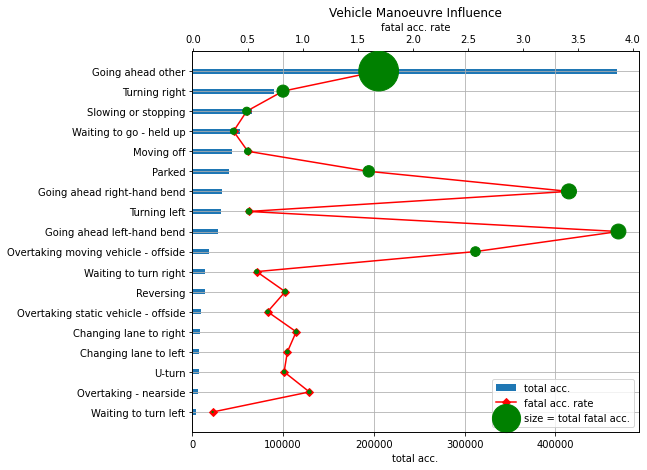

In [ ]:
manoeu_g.sort_values(by='total_acc',inplace=True)
col_plot(manoeu_g,'vehicle_manoeuvre_label',(8,7),'Vehicle Manoeuvre Influence',h = True,l_loc = 4)

Vehicle Manoeuvre Influence

Main finding:
1. bar plot -  Most off the road acc. occur in a "regular" going ahead circumstances, or while turning right (equivilant turning left in Israel).
2. red plot - The highest fatal rate accurs while going ahead right or left hand-bend. 
3. green scatter plot - The highest abssolute figures of fatal acc. occure while going ahead, going at road bends,  and turning right.

Further examination:

* Look for correlation between fatal acc. occurred at bends to specific roads (find road with high frequency of acc.) and the presence or absence  of safety rails. 
* Examine the change in the pattern of car acc. during the years as a result of change/ improvement of the roads.

### Gender Influence
Is there difference between men and women and frequent vehicle manoeuvre during acc.?


In [ ]:
# getting the gender lables
gender_index = df_dict_col[df_dict_col['field_name']=='sex_of_driver']
print(gender_index)
#cleaning the DF from unknown \unclassified\missing or out of range data.
df_gender = df_manoeu[df_manoeu.sex_of_driver.between(1,2)]

     table_name     field_name code_format                         label note
1408    Vehicle  sex_of_driver           1                          Male  NaN
1409    Vehicle  sex_of_driver           2                        Female  NaN
1410    Vehicle  sex_of_driver           3                     Not known  NaN
1411    Vehicle  sex_of_driver          -1  Data missing or out of range  NaN


In [ ]:
add_cat_label('sex_of_driver',gender_index,1,df_gender)

['Male' 'Female']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
gender_g = group_column(df_gender,'sex_of_driver',1,gender_index)
gender_g

['Male' 'Female']


,sex_of_driver,fatal_acc,total_acc,fatal_rate(%),sex_of_driver_label
0,1,10595,605566,1.75,Male
1,2,2352,262211,0.90,Female


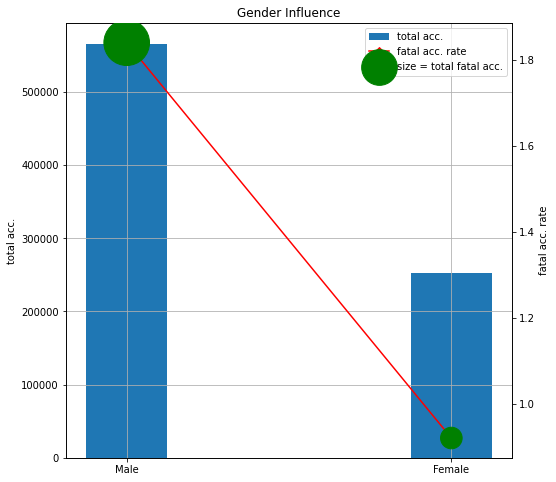

In [ ]:
col_plot(gender_g,'sex_of_driver_label',(8,8),'Gender Influence',l_loc=1)

In [ ]:
# getting data group-by vehicle_manoeuvre and sex_of_driver
gender_manoeuvre = pd.DataFrame(df_gender.groupby(['vehicle_manoeuvre','sex_of_driver_label']).agg({
    "accident_severity":lambda x: count_fatal(x), "accident_index":'count'})) 
gender_manoeuvre.rename(columns={"accident_severity":"fatal_acc","accident_index":"total_acc"},inplace=True)
gender_manoeuvre['fatal_rate(%)'] = gender_manoeuvre.fatal_acc.div(gender_manoeuvre.total_acc)*100
gender_manoeuvre = gender_manoeuvre.round(2)
print(gender_manoeuvre)

                                       fatal_acc  total_acc  fatal_rate(%)
vehicle_manoeuvre sex_of_driver_label                                     
1                 Female                      28       3065           0.91
                  Male                        80       8256           0.97
2                 Female                      69       7492           0.92
                  Male                       315      15367           2.05
3                 Female                      52      20322           0.26
                  Male                       137      30525           0.45
4                 Female                      78      21569           0.36
                  Male                       241      41495           0.58
5                 Female                      36      13306           0.27
                  Male                       180      27536           0.65
6                 Female                      17       1698           1.00
                  Male   

In [ ]:
# flat pivot table columns name 
gender_pvt=gender_manoeuvre.pivot_table(
    index="vehicle_manoeuvre", columns=["sex_of_driver_label"], values=["total_acc"])
gender_pvt.columns = ["_".join((str(k),str(i))) for i,k in gender_pvt.columns]

In [ ]:
gender_pvt['total_acc'] = gender_pvt['Male_total_acc']+gender_pvt['Female_total_acc']
gender_pvt['Men %']=gender_pvt['Male_total_acc']/gender_pvt['total_acc']*100
gender_pvt['Women %']=gender_pvt['Female_total_acc']/gender_pvt['total_acc']*100
gender_pvt['Male %']=gender_pvt['Men %'].round(2)
gender_pvt['Female %']=gender_pvt['Women %'].round(2)
Male_mean_rate = gender_pvt['Male %'].mean()
gender_pvt['Male_mean_rate'] = Male_mean_rate

#Male_mean_rate = 18*[Male_mean_rate]
Female_mean_rate = gender_pvt['Female %'].mean()
gender_pvt['Female_mean_rate'] = Female_mean_rate
#Female_mean_rate = 18*[round(Female_mean_rate,2)]
#print(Male_mean_rate,Female_mean_rate)
gender_pvt

,Female_total_acc,Male_total_acc,total_acc,Men %,Women %,Male %,Female %,Male_mean_rate,Female_mean_rate
vehicle_manoeuvre,,,,,,,,,
1,3065,8256,11321,72.926420,27.073580,72.93,27.07,70.52,29.48
2,7492,15367,22859,67.225163,32.774837,67.23,32.77,70.52,29.48
3,20322,30525,50847,60.033040,39.966960,60.03,39.97,70.52,29.48
4,21569,41495,63064,65.798237,34.201763,65.80,34.20,70.52,29.48
5,13306,27536,40842,67.420792,32.579208,67.42,32.58,70.52,29.48
6,1698,4816,6514,73.933067,26.066933,73.93,26.07,70.52,29.48
7,8761,19127,27888,68.585055,31.414945,68.59,31.41,70.52,29.48
8,1906,2524,4430,56.975169,43.024831,56.98,43.02,70.52,29.48
9,29586,55199,84785,65.104677,34.895323,65.10,34.90,70.52,29.48


In [ ]:
gender_pvt_2=gender_manoeuvre.pivot_table(
    index="vehicle_manoeuvre", columns=["sex_of_driver_label"], values=["fatal_rate(%)"])
gender_pvt_2.columns = ["_".join((str(k),str(i))) for i,k in gender_pvt_2.columns]
gender_pvt_2['Male_fatal_rate(%)']=gender_pvt_2['Male_fatal_rate(%)'].round(2)
gender_pvt_2['Female_fatal_rate(%)']=gender_pvt_2['Female_fatal_rate(%)'].round(2)
gender_pvt_2.reset_index(inplace=True)
gender_pvt_2

,vehicle_manoeuvre,Female_fatal_rate(%),Male_fatal_rate(%)
0,1,0.91,0.97
1,2,0.92,2.05
2,3,0.26,0.45
3,4,0.36,0.58
4,5,0.27,0.65
5,6,1.00,0.85
6,7,0.33,0.67
7,8,0.16,0.20
8,9,0.65,0.97
9,10,0.44,0.70


In [ ]:
gender_manoeu =gender_pvt_2.merge(gender_pvt, on='vehicle_manoeuvre')
gender_manoeu.reset_index(inplace=True)

In [ ]:
add_cat_label('vehicle_manoeuvre',manoeu_index,1,gender_manoeu)
gender_manoeu

['Reversing' 'Parked' 'Waiting to go - held up' 'Slowing or stopping'
 'Moving off' 'U-turn' 'Turning left' 'Waiting to turn left'
 'Turning right' 'Waiting to turn right' 'Changing lane to left'
 'Changing lane to right' 'Overtaking moving vehicle - offside'
 'Overtaking static vehicle - offside' 'Overtaking - nearside'
 'Going ahead left-hand bend' 'Going ahead right-hand bend'
 'Going ahead other']


,index,vehicle_manoeuvre,Female_fatal_rate(%),Male_fatal_rate(%),Female_total_acc,Male_total_acc,total_acc,Men %,Women %,Male %,Female %,Male_mean_rate,Female_mean_rate,vehicle_manoeuvre_label
0,0,1,0.91,0.97,3065,8256,11321,72.926420,27.073580,72.93,27.07,70.52,29.48,Reversing
1,1,2,0.92,2.05,7492,15367,22859,67.225163,32.774837,67.23,32.77,70.52,29.48,Parked
2,2,3,0.26,0.45,20322,30525,50847,60.033040,39.966960,60.03,39.97,70.52,29.48,Waiting to go - held up
3,3,4,0.36,0.58,21569,41495,63064,65.798237,34.201763,65.80,34.20,70.52,29.48,Slowing or stopping
4,4,5,0.27,0.65,13306,27536,40842,67.420792,32.579208,67.42,32.58,70.52,29.48,Moving off
5,5,6,1.00,0.85,1698,4816,6514,73.933067,26.066933,73.93,26.07,70.52,29.48,U-turn
6,6,7,0.33,0.67,8761,19127,27888,68.585055,31.414945,68.59,31.41,70.52,29.48,Turning left
7,7,8,0.16,0.20,1906,2524,4430,56.975169,43.024831,56.98,43.02,70.52,29.48,Waiting to turn left
8,8,9,0.65,0.97,29586,55199,84785,65.104677,34.895323,65.10,34.90,70.52,29.48,Turning right
9,9,10,0.44,0.70,5645,7736,13381,57.813317,42.186683,57.81,42.19,70.52,29.48,Waiting to turn right


In [ ]:
#defining marker size for scatter-plot
size_men = (gender_manoeu['Male_fatal_rate(%)'].tolist())
print(f'max:{max(size_men)},min:{min(size_men)}')
size_men = [80*i for i in size_men]

size_women= (gender_manoeu['Female_fatal_rate(%)'].tolist())
size_women = [80*i for i in size_women]

max:4.56,min:0.2


In [ ]:
gender_manoeu.sort_values(by='Male %',inplace=True)

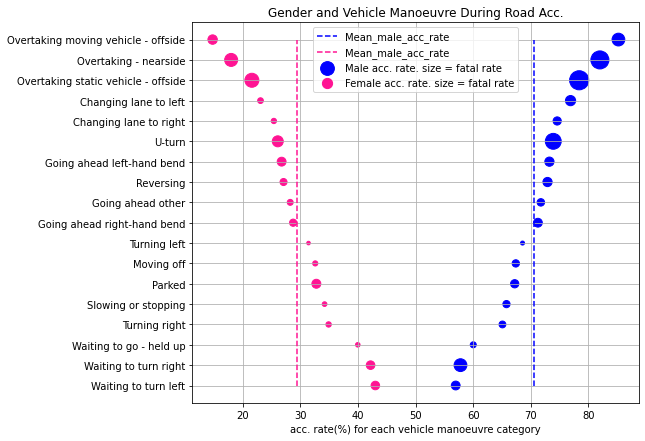

In [ ]:
plt.figure(figsize=(8,7))
plt.title("Gender and Vehicle Manoeuvre During Road Acc.")
plt.xlabel("acc. rate(%) for each vehicle manoeuvre category")
plt.scatter(gender_manoeu['Male %'],gender_manoeu['vehicle_manoeuvre_label'],
            color = 'b',s=size_men,label = 'Male acc. rate. size = fatal rate')
plt.scatter(gender_manoeu['Female %'],gender_manoeu['vehicle_manoeuvre_label'],
            color = 'deeppink',s=size_women, label = 'Female acc. rate. size = fatal rate')
men_mean_line = plt.plot(gender_manoeu['Male_mean_rate'],gender_manoeu['vehicle_manoeuvre_label'],
                         label='Mean_male_acc_rate', linestyle='--',color='b')
female_mean_line = plt.plot(gender_manoeu['Female_mean_rate'],gender_manoeu['vehicle_manoeuvre_label'],
                            label='Mean_male_acc_rate', linestyle='--',color='deeppink')
plt.grid()
plt.legend();

###Conclusion/ Main findings:

1. Men commit 70% of road accidents.
2. The average fatal rate of Men acc. is 1.75% while the Female rate is 0.9%. -i.e men couse more than twice fatal acc. than women, and five times in absolute figures.
3. There ar differences between women and men commom vehicle manoeuvres at the time of the accident: Men tends to do more acc. while overtaking other vehicle and changing lanes. most of the women acc. occurs while whaiting to turn or go ahead and these acc. tends to be less sevire.
* these findings are compatible with the fact that women are offered lower car insurance premiums.

Further examination:

In follow-up examination, we would look if these findings are also true for public transportion drivers (gender and also add the age influence).

##Qeustion 4

### Target:

Find the main characteristics and factors that effect the rate of fatal road accidents, given that an accident occured.

Daily Acc. Distribution
*   Examine the distribution of road accidents during the week.
*   Is there a difference between total acc. or fatal acc. during middle weekd VS weekend?
*   Does the fatal acc. rate during middle-week/weekend varies between different age groups?
* who drives better, young or older drivers?



--> We would think that weekend might have correlation with more serious acc., especially in relation with young drivers.
--> We would like to understand if in absolute values there are more fatal acc. during weekend and whether it is rquired to invest more enforcement forces over weekend.


In [ ]:
# getting the days lables
day_lables = df_dict_col[df_dict_col['field_name']=='day_of_week']
day_lables['code_format'] = day_lables['code_format'].astype(int)
day_lables = day_lables[day_lables.code_format.between(1,7)]
day_lables


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,table_name,field_name,code_format,label,note
65,Accident,day_of_week,1,Sunday,NaN
66,Accident,day_of_week,2,Monday,NaN
67,Accident,day_of_week,3,Tuesday,NaN
68,Accident,day_of_week,4,Wednesday,NaN
69,Accident,day_of_week,5,Thursday,NaN
70,Accident,day_of_week,6,Friday,NaN
71,Accident,day_of_week,7,Saturday,NaN


In [ ]:
add_cat_label('day_of_week',day_lables,1,acc_join)
df_day = acc_join[acc_join.day_of_week.between(1,7)]

['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']


In [ ]:
day_g = group_column(df_day,'day_of_week',1,day_lables)
day_g

['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']


,day_of_week,fatal_acc,total_acc,fatal_rate(%),day_of_week_label
0,1,2041,106292,1.92,Sunday
1,2,1796,136735,1.31,Monday
2,3,1710,143300,1.19,Tuesday
3,4,1866,145793,1.28,Wednesday
4,5,1941,148904,1.30,Thursday
5,6,2039,158691,1.28,Friday
6,7,2056,124573,1.65,Saturday


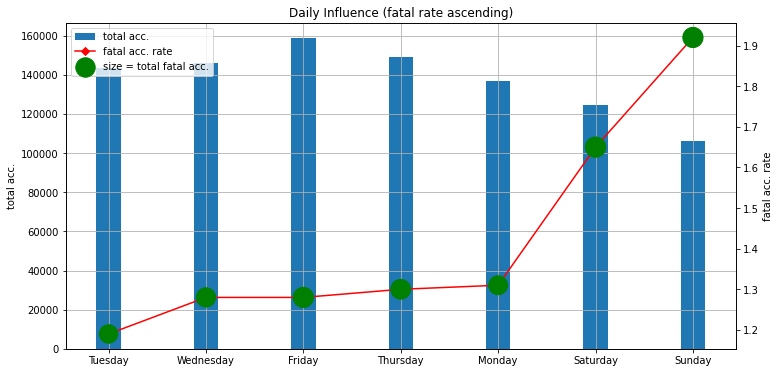

In [ ]:
day_g.sort_values(by='fatal_rate(%)',inplace=True)
col_plot(day_g,'day_of_week_label',(12,6),'Daily Influence (fatal rate ascending)')

We can learn that there are less Acc. during week-end but the fatal rate is higher. The total fatal acc. distribute evenly on weekdays.
We will define Week-end category and explore if there is correlation to age category.

In [ ]:
def is_weekend(row):
    return row.loc['day_of_week_label'] in ['Friday', 'Saturday']

df_day['is_weekend'] = df_day.apply(is_weekend, axis=1)
df_day.is_weekend.value_counts()

False    681024
True     283264
Name: is_weekend, dtype: int64

### Age Influence

In [ ]:
age_lables = df_dict_col[df_dict_col['field_name']=='age_band_of_driver']
age_lables['code_format'] = age_lables['code_format'].astype(int)
age_lables = age_lables[age_lables.code_format.between(4,11)]
age_lables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,table_name,field_name,code_format,label,note
1417,Vehicle,age_band_of_driver,4,16 - 20,NaN
1418,Vehicle,age_band_of_driver,5,21 - 25,NaN
1419,Vehicle,age_band_of_driver,6,26 - 35,NaN
1420,Vehicle,age_band_of_driver,7,36 - 45,NaN
1421,Vehicle,age_band_of_driver,8,46 - 55,NaN
1422,Vehicle,age_band_of_driver,9,56 - 65,NaN
1423,Vehicle,age_band_of_driver,10,66 - 75,NaN
1424,Vehicle,age_band_of_driver,11,Over 75,NaN


In [ ]:
add_cat_label('age_band_of_driver',age_lables,4,df_day)
df_day

['46 - 55' '21 - 25' '36 - 45' '16 - 20' '26 - 35' -1 '56 - 65' 'Over 75'
 '66 - 75' 3 2 1]


,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day_of_week_label,is_weekend,age_band_of_driver_label
0,2016010000005,2016,010000005,1,8,0,6,3,7,0,0,0,0,0,0,3,1,1,1,51,8,-1,-1,-1,-1,3,1,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,E09000005,3,4006,6,30.0,0,-1,-1,-1,0,0,5,1,1,0,0,1,1,2,E01000543,Tuesday,False,46 - 55
1,2016010000005,2016,010000005,2,2,0,18,7,3,0,0,0,0,0,0,1,1,6,1,23,5,124,1,4,-1,4,1,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,E09000005,3,4006,6,30.0,0,-1,-1,-1,0,0,5,1,1,0,0,1,1,2,E01000543,Tuesday,False,21 - 25
2,2016010000006,2016,010000006,1,9,0,18,5,1,0,2,2,10,1,0,4,1,6,2,36,7,1461,2,1,-1,10,1,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,2,E01000375,Tuesday,False,36 - 45
3,2016010000008,2016,010000008,1,9,0,18,1,8,0,4,5,0,0,0,1,1,6,1,24,5,1390,1,5,-1,8,1,2016,010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,2,E01033725,Tuesday,False,21 - 25
4,2016010000016,2016,010000016,1,11,0,18,5,1,0,1,0,0,0,0,0,1,1,1,55,8,6692,2,7,-1,9,1,2016,010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,2,E01003379,Tuesday,False,46 - 55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964283,2020991030297,2020,991030297,1,9,0,7,8,2,0,6,0,0,0,0,3,1,1,1,57,9,1968,2,2,AUDI A5,7,1,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60.0,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1,Wednesday,False,56 - 65
964284,2020991030297,2020,991030297,2,5,0,16,6,2,0,1,0,0,0,0,1,1,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60.0,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1,Wednesday,False,36 - 45
964285,2020991030900,2020,991030900,1,9,0,7,8,2,0,6,0,0,0,0,3,1,6,2,68,10,1995,2,1,BMW X3,5,1,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30.0,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1,Tuesday,False,66 - 75
964286,2020991030900,2020,991030900,2,1,0,18,6,2,4,8,0,0,0,0,1,1,6,1,76,11,-1,-1,-1,-1,9,1,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30.0,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1,Tuesday,False,Over 75


In [ ]:
df_day_age = df_day[df_day.age_band_of_driver.between(4,11)]

In [ ]:
age_g = group_column(df_day_age,'age_band_of_driver_label',4,age_lables)
age_g

['16 - 20' '21 - 25' '26 - 35' '36 - 45' '46 - 55' '56 - 65' '66 - 75'
 'Over 75']


,age_band_of_driver_label,fatal_acc,total_acc,fatal_rate(%),age_band_of_driver_label_label
0,16 - 20,792,66269,1.20,16 - 20
1,21 - 25,1367,98783,1.38,21 - 25
2,26 - 35,2657,203673,1.30,26 - 35
3,36 - 45,2096,159430,1.31,36 - 45
4,46 - 55,2330,147777,1.58,46 - 55
5,56 - 65,1781,89843,1.98,56 - 65
6,66 - 75,973,44767,2.17,66 - 75
7,Over 75,811,28251,2.87,Over 75


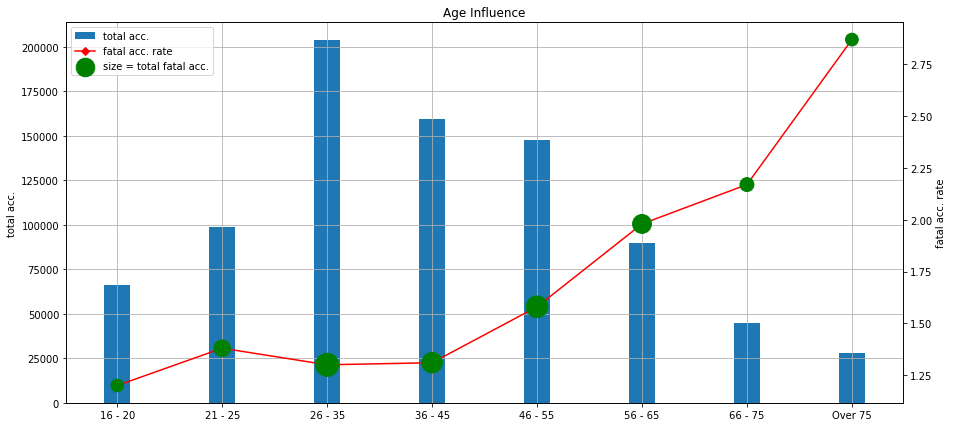

In [ ]:
# weather_g.sort_values(by='weather_conditions')
col_plot(age_g,'age_band_of_driver_label',(15,7),'Age Influence')

* Most accidents occur by drivers aged 26-55 (makes sense since they drive more).
* The rate of fatal acc. increases with the age of drivers, especially over the age of 65.

In [ ]:
#day_age
day_age_g = df_day_age.groupby(['age_band_of_driver_label','is_weekend']).agg({
    "accident_severity":lambda x: count_fatal(x), "accident_index":'count'})
day_age_g.reset_index(inplace=True)
day_age_g.rename(columns={
    'accident_severity':'fatal_day_age_acc', 'accident_index':'total_day_age_acc'},inplace = True)
print(day_age_g)

   age_band_of_driver_label  is_weekend  fatal_day_age_acc  total_day_age_acc
0                   16 - 20       False                536              46193
1                   16 - 20        True                256              20076
2                   21 - 25       False                918              68632
3                   21 - 25        True                449              30151
4                   26 - 35       False               1784             143270
5                   26 - 35        True                873              60403
6                   36 - 45       False               1454             112932
7                   36 - 45        True                642              46498
8                   46 - 55       False               1633             105245
9                   46 - 55        True                697              42532
10                  56 - 65       False               1288              64160
11                  56 - 65        True                493      

In [ ]:
day_age_m = pd.merge(day_age_g,age_g, on = 'age_band_of_driver_label',how='left')

In [ ]:
#day_age_m['age_weekend(%)'] = day_age_m.total_day_age_acc.div(day_age_m.total_acc)*100
#day_age_m = day_age_m.round(2)
#day_age_m['age_weekend_fatal(%)'] = day_age_m.fatal_day_age_acc.div(day_age_m.fatal_acc)*100
#day_age_m = day_age_m.round(2)
day_age_m['fatal_day_age_%'] = round(100*day_age_m['fatal_day_age_acc']/day_age_m['total_day_age_acc'],2)
day_age_m

,age_band_of_driver_label,is_weekend,fatal_day_age_acc,total_day_age_acc,fatal_acc,total_acc,fatal_rate(%),age_band_of_driver_label_label,fatal_day_age_%
0,16 - 20,False,536,46193,792,66269,1.20,16 - 20,1.16
1,16 - 20,True,256,20076,792,66269,1.20,16 - 20,1.28
2,21 - 25,False,918,68632,1367,98783,1.38,21 - 25,1.34
3,21 - 25,True,449,30151,1367,98783,1.38,21 - 25,1.49
4,26 - 35,False,1784,143270,2657,203673,1.30,26 - 35,1.25
5,26 - 35,True,873,60403,2657,203673,1.30,26 - 35,1.45
6,36 - 45,False,1454,112932,2096,159430,1.31,36 - 45,1.29
7,36 - 45,True,642,46498,2096,159430,1.31,36 - 45,1.38
8,46 - 55,False,1633,105245,2330,147777,1.58,46 - 55,1.55
9,46 - 55,True,697,42532,2330,147777,1.58,46 - 55,1.64


In [ ]:
x = day_age_m[day_age_m['is_weekend']]['age_band_of_driver_label']
y1 = day_age_m[day_age_m['is_weekend']]['total_day_age_acc']
y2 = day_age_m[~day_age_m['is_weekend']]['total_day_age_acc']
y3 = day_age_m[day_age_m['is_weekend']]['fatal_day_age_%']
y4 = day_age_m[~day_age_m['is_weekend']]['fatal_day_age_%']
print(x,y1,y2,y3,y4)

1     16 - 20
3     21 - 25
5     26 - 35
7     36 - 45
9     46 - 55
11    56 - 65
13    66 - 75
15    Over 75
Name: age_band_of_driver_label, dtype: object 1     20076
3     30151
5     60403
7     46498
9     42532
11    25683
13    12835
15     8074
Name: total_day_age_acc, dtype: int64 0      46193
2      68632
4     143270
6     112932
8     105245
10     64160
12     31932
14     20177
Name: total_day_age_acc, dtype: int64 1     1.28
3     1.49
5     1.45
7     1.38
9     1.64
11    1.92
13    2.01
15    2.81
Name: fatal_day_age_%, dtype: float64 0     1.16
2     1.34
4     1.25
6     1.29
8     1.55
10    2.01
12    2.24
14    2.89
Name: fatal_day_age_%, dtype: float64


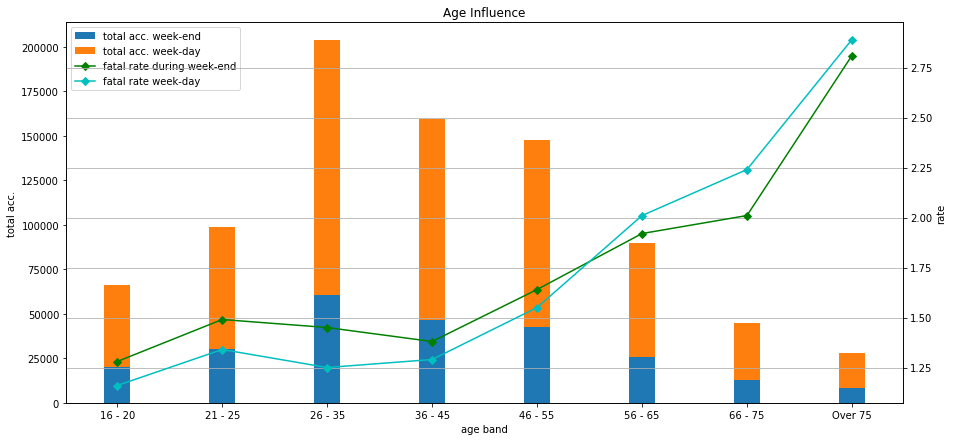

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15,7)
pl_1 = plt.bar(x,y1,width = 0.25,label = 'total acc. week-end')
pl_2 = plt.bar(x,y2,width = 0.25,label = 'total acc. week-day',bottom=y1)
plt.ylabel('total acc.')
plt.xlabel('age band')
plt.legend()
plt.title("Age Influence")
ax3 = ax.twinx()

pl_3 = plt.plot(x,y3,'-gD', label = 'fatal rate during week-end')
pl_4 = plt.plot(x,y4,'-cD', label = 'fatal rate week-day')

plt.ylabel('rate')
plt.grid()

pl = [pl_1]+[pl_2] +pl_3+pl_4
labs = [l.get_label() for l in pl]
ax.legend(pl, labs, loc = 2);


###Conclusion/ Main findings:
1. Bar plot 
    
* blue - total acc. during week-end
* orange - total acc. during middle week.
    
    The proportions of total acc. between weekend and middle week are maintained under different ages of drivers.
2. There is a positive trend between the age and fatal acc. rate.
3. We can see that for younger drivers, the fatal acc. rate is higher during the week-end, while for older drivers the fatal rate is higher during the middle of the week.

Recommendation: 

--> Eligibility test/training for drivers over the age of 65.

--> Subsidize public transportation for young people on weekends.

Further examination:
* Find groups of aggregate factors that significally increase the probabillity of a fatal acc. to occur.

##Qeustion 5

### Target:

* Find the lacations of "red roads" 
* Estimate the significant characteristics of "red roads"
* Policy recommendation (resources, action type, etc.)

**Outline:**

Steps:
1. filtering fatal casualties only and filtering fatal accidents only (~8100)
2. classification by accidents density by creation squares. (lon,lat) (~4300)
3. Adding a new column ("is_dark" ) by the time and date that the accident is occurred and filtered accordingly.
 (~2000)
4. locations with no light condition (~577)
5. classification- stage 2  (~26 acc)

**Final result:**  

Four selected locations to invest in

* **step 1:**

    Filtering fatal casualties only and filtering fatal accidents only

    (~8100 accidents)


In [ ]:
df_cus_sev_raw = df_cau[df_cau.casualty_severity == 1].set_index('accident_index')
df_cus_sev_raw = pd.DataFrame(df_cau.casualty_severity)
df_cus_sev_raw= df_acc.join(df_cus_sev_raw)[['accident_year', 'longitude', 'latitude','number_of_vehicles', 
                                                                   'accident_severity', 'local_authority_district', 'first_road_number',
                                                                   'road_type','first_road_class','second_road_class','second_road_number',
                                                                   'weather_conditions','junction_detail','light_conditions','time','date']]
df_cus_sev_raw = df_cus_sev_raw[df_cus_sev_raw.accident_severity == 1]

df_cus_sev1 = df_cus_sev_raw
df_cus_sev1 = df_cus_sev1[df_cus_sev1['latitude'].notna()]
df_cus_sev1 = df_cus_sev1[df_cus_sev1.accident_severity == 1]
df_cus_sev1['square_b'] = round(df_cus_sev1.longitude,0).apply(str) + ':' + round(df_cus_sev1.latitude,0).apply(str)
df_cus_sev1['square_s'] = round(df_cus_sev1.longitude,1).apply(str) + ':' + round(df_cus_sev1.latitude,1).apply(str)
print('df_cus_sev1: ', df_cus_sev1.shape)                                                                #(5833, 17)


df_cus_sev1:  (8090, 18)


* **step 2:**

    classification by accidents density by creation squares. (lon,lat) 

    (~4300 accidents)

In [ ]:
df_cus_sev1_sqr = df_cus_sev1.square_s.value_counts()
df_cus_sev1_sqr = df_cus_sev1_sqr[df_cus_sev1_sqr > 5]
df_cus_sev1_sqr = list(df_cus_sev1_sqr.index)
df_cus_sev1['hour'] = pd.to_datetime(df_cus_sev1.time).dt.hour
df_cus_sev1['month'] = pd.to_datetime(df_cus_sev1.date,  format='%d/%m/%Y').dt.month

df_cus_sev2 = df_cus_sev1[df_cus_sev1['square_s'].isin(df_cus_sev1_sqr)]
print('df_cus_sev2: ', df_cus_sev2.shape) 

df_cus_sev2:  (4358, 20)


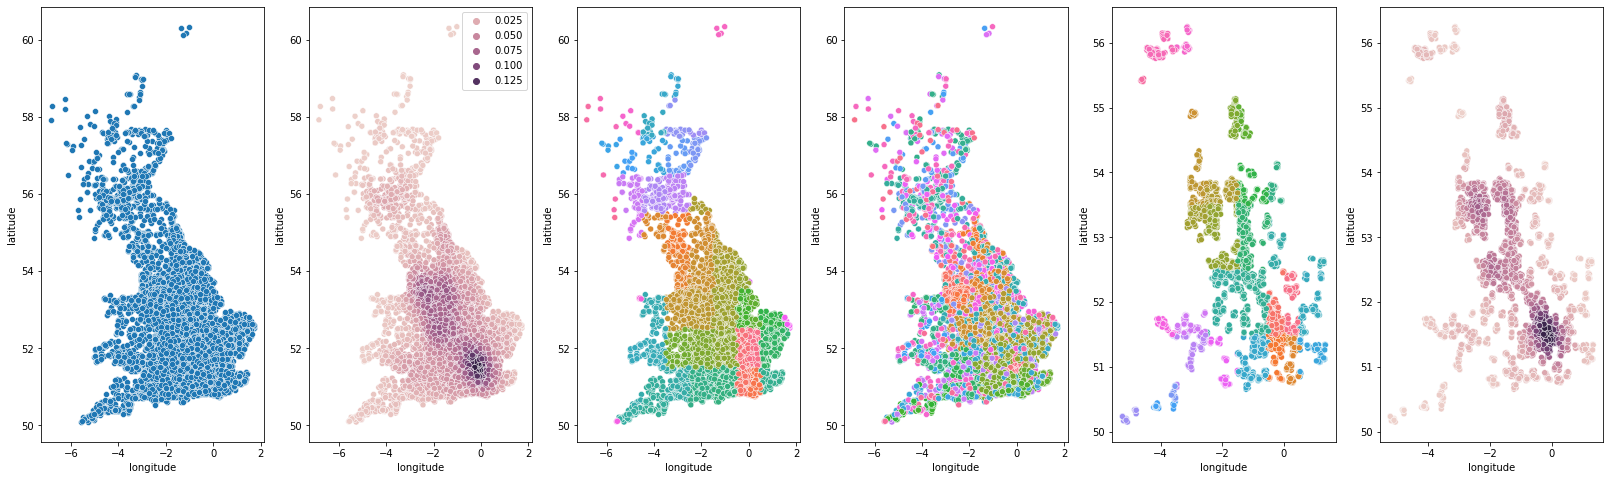

In [ ]:
#based on https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib

from scipy.stats import gaussian_kde

x1 = df_cus_sev1.longitude
y1 = df_cus_sev1.latitude
xy1 = np.vstack([x1,y1])
z1 = gaussian_kde(xy1)(xy1)

x2 = df_cus_sev2.longitude
y2 = df_cus_sev2.latitude
xy2 = np.vstack([x2,y2])
z2 = gaussian_kde(xy2)(xy2)

fig, axes = plt.subplots(1, 6, figsize=(28, 8))
sns.scatterplot(ax=axes[0], data=df_cus_sev1, x='longitude', y='latitude')
sns.scatterplot(ax=axes[1], data=df_cus_sev1, x='longitude', y='latitude', hue = z1)
sns.scatterplot(ax=axes[2], data=df_cus_sev1, x='longitude', y='latitude', hue = 'square_b',legend=False)
sns.scatterplot(ax=axes[3], data=df_cus_sev1, x='longitude', y='latitude', hue = 'square_s',legend=False)
sns.scatterplot(ax=axes[4], data=df_cus_sev2, x='longitude', y='latitude', hue = 'square_b',legend=False)
sns.scatterplot(ax=axes[5], data=df_cus_sev2, x='longitude', y='latitude', hue = z2, legend=False)
# plt.legend(loc='upper right')

* **step 3:**

    Adding a new column ("is_dark" ) by the time and date that the accident is occurred and filtered accordingly.

    (~2000 accidents)

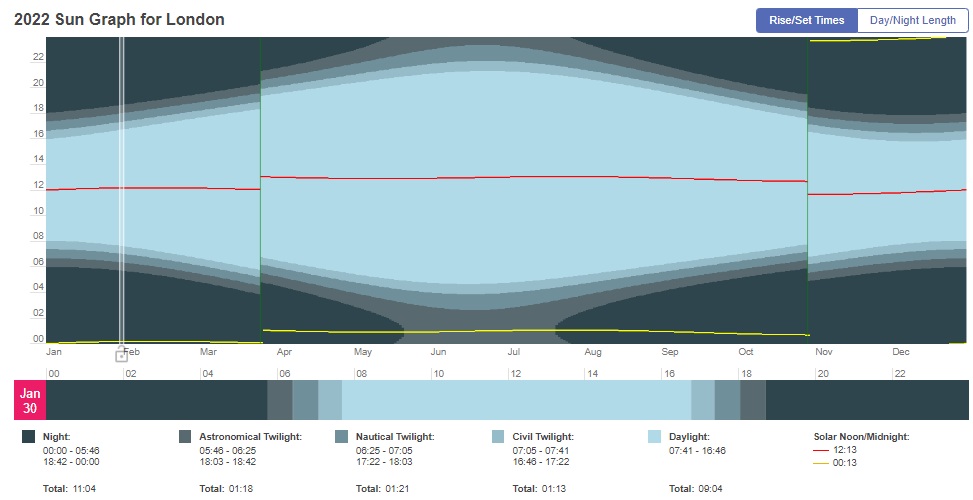

In [ ]:
# based on: https://www.timeanddate.com/sun/uk/london

df_light_hour['Sunset'] = pd.to_datetime(df_light_hour['Sunset'],format= '%H:%M' ).dt.time
df_light_hour['Sunrise'] = pd.to_datetime(df_light_hour['Sunrise'],format= '%H:%M' ).dt.time
df_light_hour.head()

,Month,Month_name,Sunrise,Sunset,Hours of daylight
0,1,January,07:57:00,16:22:00,8:25 h
1,2,February,07:12:00,17:16:00,10:05 h
2,3,March,06:12:00,18:06:00,11:54 h
3,4,April,06:02:00,19:58:00,13:56 h
4,5,May,05:06:00,20:47:00,15:41 h


In [ ]:
def is_dark(row):
    m_row = int(row.month)
    h_row = row.time
    sr = df_light_hour.iloc[m_row-1]['Sunrise']
    ss = df_light_hour.iloc[m_row-1]['Sunset']

    if (h_row >= sr) and (h_row < ss) :
        return "N" 
    else:
        return "Y"

df_cus_sev3 = df_cus_sev2
df_cus_sev3 = df_cus_sev3[df_cus_sev3.light_conditions > 1.0].copy()
df_cus_sev3['time'] = pd.to_datetime(df_cus_sev3['time'],format= '%H:%M' ).dt.time

df_cus_sev3["is_dark"] = df_cus_sev3.apply(is_dark, axis=1)
print('df_cus_sev3: ', df_cus_sev3.shape)   #2000

df_cus_sev3:  (2000, 21)


In [ ]:
df_cus_sev3.head()

,accident_year,longitude,latitude,number_of_vehicles,accident_severity,local_authority_district,first_road_number,road_type,first_road_class,second_road_class,second_road_number,weather_conditions,junction_detail,light_conditions,time,date,square_b,square_s,hour,month,is_dark
1230,2016,-0.125868,51.497333,2,1,1.0,3212,NaN,3,6.0,0.0,2.0,9.0,4.0,17:59:00,16/11/2016,-0.0:51.0,-0.1:51.5,17,11,Y
1241,2016,-0.162473,51.615176,2,1,30.0,0,1.0,6,6.0,0.0,1.0,2.0,4.0,17:48:00,17/11/2016,-0.0:52.0,-0.2:51.6,17,11,Y
1260,2016,-0.044079,51.513084,1,1,5.0,13,3.0,3,6.0,0.0,2.0,3.0,4.0,23:20:00,17/11/2016,-0.0:52.0,-0.0:51.5,23,11,Y
1371,2016,-0.139211,51.534056,1,1,2.0,400,NaN,3,6.0,0.0,1.0,5.0,4.0,01:35:00,19/11/2016,-0.0:52.0,-0.1:51.5,1,11,Y
2072,2016,0.125334,51.415348,1,1,18.0,211,NaN,3,NaN,NaN,1.0,0.0,4.0,06:28:00,28/11/2016,0.0:51.0,0.1:51.4,6,11,Y


* we expected to high correlation between fatal accident and datk roads. 

* we have realized that most of the fatal accident have occured in light conditions.  

* to explore these penomena we need more information.
therefore, we have consintrate in cases that were darkness situations.

,light_conditions
label,
Darkness - lights unlit,62
Darkness - lighting unknown,90
Darkness - no lighting,515
Darkness - lights lit,1333


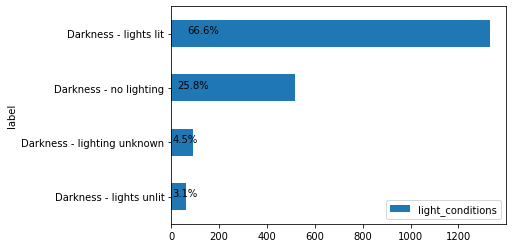

In [ ]:
df_light_dict= df_dict_col[df_dict_col['field_name']=='light_conditions']
#df_light_dict['code_format'] = df_light_dict['code_format'].astype('float64')
df_dict_col.loc[df_light_dict.index, 'code_format'] = df_light_dict['code_format'].astype('float64')
df_light_dict = df_light_dict.set_index('code_format')

pvt = pd.DataFrame(df_cus_sev3.light_conditions.value_counts(ascending=True))
pvt = pvt.join(df_light_dict.label).set_index('label')
pvt.plot.barh()

pvt_p = pvt.div(pvt.sum(axis = 0),axis = 1)*100

for index, value in enumerate(pvt_p.light_conditions):
    plt.text(value, index, str(round(value,1))+ '%')
pvt

* **step 4:**

    locations with no light condition

    (~577 accidents)

In [ ]:
df_cus_sev4 = df_cus_sev3
df_cus_sev4 = df_cus_sev4[(df_cus_sev4['light_conditions'] == 5.0) | (df_cus_sev4['light_conditions'] == 6.0)]
print(df_cus_sev4.shape)

df_cus_sev4_sqr = df_cus_sev4.square_s.value_counts()
df_cus_sev4_sqr = df_cus_sev4_sqr[df_cus_sev4_sqr > 5]
df_cus_sev4_sqr = list(df_cus_sev4_sqr.index)

(577, 21)


* **step 5:**

    classification- stage 2

    (26 accidents)

    (4 areas)

In [ ]:
df_cus_sev5 = df_cus_sev4[df_cus_sev4['square_s'].isin(df_cus_sev4_sqr)]
print(df_cus_sev5.shape)  
print(len(df_cus_sev4_sqr))

(26, 21)
4


In [ ]:
df_cus_sev5.head()

,accident_year,longitude,latitude,number_of_vehicles,accident_severity,local_authority_district,first_road_number,road_type,first_road_class,second_road_class,second_road_number,weather_conditions,junction_detail,light_conditions,time,date,square_b,square_s,hour,month,is_dark
67102,2016,-1.475331,52.863063,1,1,328,50,3,3,-1,-1,1,0,6,02:00:00,24/02/2016,-1.0:53.0,-1.5:52.9,2,2,Y
87300,2016,0.063911,51.687825,3,1,456,25,3,1,-1,-1,1,0,6,01:55:00,29/03/2016,0.0:52.0,0.1:51.7,1,3,Y
119889,2016,-2.114607,51.840670,1,1,625,417,6,3,-1,-1,1,0,6,02:55:00,31/08/2016,-2.0:52.0,-2.1:51.8,2,8,Y
126221,2016,-3.862482,51.703673,3,1,745,4067,6,3,-1,-1,1,0,6,22:13:00,04/07/2016,-4.0:52.0,-3.9:51.7,22,7,Y
203124,2017,-1.535530,52.868703,2,1,328,50,3,3,-1,-1,1,0,6,22:17:00,23/02/2017,-2.0:53.0,-1.5:52.9,22,2,Y


* get the "junction_detail" of these accidents:

,junction_detail
label,
Mini-roundabout,1
More than 4 arms (not roundabout),9
Private drive or entrance,17
Slip road,42
Other junction,49
Roundabout,84
Crossroads,132
T or staggered junction,435
Not at junction or within 20 metres,1231


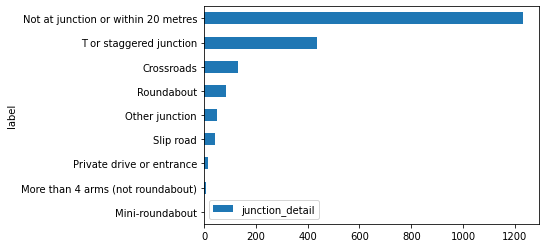

In [ ]:
df_light_dict= df_dict_col[df_dict_col['field_name']=='junction_detail']

#df_light_dict['code_format'] = df_light_dict['code_format'].astype('float64')
df_dict_col.loc[df_light_dict.index, 'code_format'] = df_light_dict['code_format'].astype('float64')

df_light_dict = df_light_dict.set_index('code_format')

pvt = pd.DataFrame(df_cus_sev3.junction_detail.value_counts(ascending=True))
pvt = pvt.join(df_light_dict.label).set_index('label')
pvt.plot.barh()
pvt

* get the "road_type" of these accidents:

In [ ]:
df_cus_sev5.road_type.value_counts()
#road_type == 3  -->  "Dual carriageway"

6    14
3    12
Name: road_type, dtype: int64

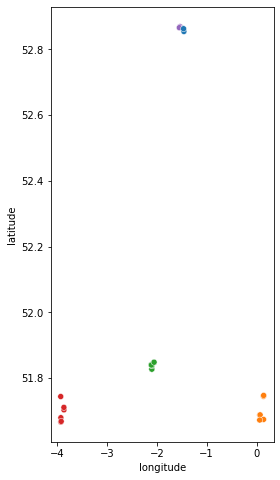

In [ ]:
plt.subplots(figsize=(4,8))
sns.scatterplot(data=df_cus_sev5, x='longitude', y='latitude', hue = 'square_b', legend=False	) #

In [ ]:
pip install ipyleaflet

In [ ]:
from ipyleaflet import Map, Marker, LayersControl, CircleMarker, GeoJSON
class Map(Map):
    def _init_(self, **kwargs):
        super()._init_(**kwargs)
        
data = {
    "type": "Feature",
    "properties": {    },
    "geometry": {
        "type": "MultiPoint",
        "coordinates": []
    }
};

m = Map(center=(52, 0), zoom=6)
cords = list(zip(list(df_cus_sev5.longitude), list(df_cus_sev5.latitude)))
data['geometry']['coordinates'] = cords

geo_json = GeoJSON(data=data,
                   style={'opacity': 1, 'dashArray': '9', 'fillOpacity': 0.1, 'weight': 1})
m.add_layer(geo_json)

control = LayersControl(position='topright')
m.add_control(geo_json)

m

Map(center=[52, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

###Conclusion:

Our recommendation is to consider adding a light posts to four specific dark roads where fatal accidents are often occured

### Appendix:

Length in meters of 1° of latitude = always 111.32 km

Length in meters of 1° of longitude = 40075 km * cos( latitude ) / 360

Finding the distance (in km) between two accidents

In [ ]:
import math

def measure(lat1, lon1, lat2, lon2):
    R = 6378.137; #// Radius of earth in KM
    dLat = lat2 * math.pi / 180 - lat1 * math.pi / 180;
    dLon = lon2 * math.pi / 180 - lon1 * math.pi / 180;
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * math.sin(dLon/2) * math.sin(dLon/2);
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a));
    d = R * c;
    return d ; #// km

BBox = (round(df_cus_sev1.longitude.min(),3),
        round(df_cus_sev1.longitude.max(),3),      
        round(df_cus_sev1.latitude.min(),3),
        round(df_cus_sev1.latitude.max(),3))
BBox
BBox = (-6.1, -6.0, 60.4, 60.4)
print(measure(BBox[2], BBox[0], BBox[3], BBox[1]))
print(BBox[2], BBox[0], BBox[3], BBox[1])

5.498535179339376
60.4 -6.1 60.4 -6.0


# Further examination:
* Normalize the number of accidents to the number of vehicles on the road and also the length of the road
* Examining the gender and age band influence for accidents that occur in public transportation.
* Look for correlation between fatal acc. occurred at bends to specific roads (find road with high frequency of acc.) and the presence or absence  of safety rails. 
* Examine the change in the pattern of car acc. during the years as a result of change/ improvement of the roads.
* Find groups of aggregate factors that significally increase the probabillity of a fatal acc. to occur.

